In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import matplotlib.pyplot as plt
import numpy as np
ppath = "/Users/glengyel/Library/Mobile Documents/com~apple~CloudDocs/Projects/Neural_link_of_CI/neural_link/results/"
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.stats import gaussian_kde

from scipy.stats import multivariate_normal
from scipy.stats import norm
from scipy.stats import beta
import h5py

clist = []
for cname in ["winter", "spring"]:
    c = cm.get_cmap(cname, 100)
    clist.append(ListedColormap(c(np.linspace(0, 1, 10))))

p = os.getcwd()
Pth = os.path.dirname(p)
FigPath= "/plots/"
saveFigPath = Pth+FigPath

FigParams = {
    "fig_size": 6,
    "font1": {"fontname": "Arial", "size": 30},
    "font2": {"fontname": "Arial", "size": 30},
    "line_w": 2,
    "colors_maps": clist,
    "colors_names": ["royalblue", "olivedrab", "darkorange", "firebrick"],
    "saveFigPath": saveFigPath,
    "ErrorBar": {'ErrDist':[0.4,0.4],
                 'ErrSize':1,
                 'ErrWid':4,
                 'sizedots':10,
                 'ErrColor':["royalblue", "olivedrab", "darkorange", "firebrick"],
                 'DotsColor':["royalblue", "olivedrab", "darkorange", "firebrick"],
                 'sizeMean':25},
}


def packParams():
    return (FigParams["fig_size"],
            FigParams["font1"],
            FigParams["font2"],
            FigParams["line_w"],
            FigParams["colors_maps"],
            FigParams["colors_names"],
            FigParams["saveFigPath"],)


def vector_subtract(direction1, speed1, direction2, speed2):
    # Convert direction and speed to Cartesian coordinates
    x1 = speed1 * np.cos(np.radians(direction1))
    y1 = speed1 * np.sin(np.radians(direction1))
    x2 = speed2 * np.cos(np.radians(direction2))
    y2 = speed2 * np.sin(np.radians(direction2))
    
    # Subtract the vectors
    x_diff = x1 - x2
    y_diff = y1 - y2
    
    # Convert the result back to direction and speed
    result_speed = np.sqrt(x_diff**2 + y_diff**2)
    result_direction = np.degrees(np.arctan2(y_diff, x_diff))
    
    # Ensure the direction is in the range [-180, 180)
    if result_direction >= 180:
        result_direction -= 360
    elif result_direction < -180:
        result_direction += 360
    
    return result_direction, result_speed



In [2]:
figS, f_font1, f_font2, line_w, cm, cn, sp = packParams()

# Example observer

In [3]:
# Example usage
direction1 = 132  # degrees
speed1 = 4  # units
direction2 = 0  # degrees
speed2 = 4  # units

result_direction, result_speed = vector_subtract(direction1, speed1, direction2, speed2)
print(f"Result Direction: {result_direction} degrees")
print(f"Result Speed: {result_speed} units")

Result Direction: 156.00000000000003 degrees
Result Speed: 7.308363661140807 units


In [4]:
# open the file in read mode
files = [
         'post_vel_relVar_subj1_struct1.mat',
            'post_vel_relVar_subj1_struct2.mat',
            'post_vel_relVar_subj1_struct3.mat',
            'post_vel_relVar_subj1_struct4.mat',
            'post_vel_relVar_subj1_struct5.mat',
            'post_vel_relVar_subj1_structAll.mat'
]
struct_all = []
for n in files:
    # open the file in read mode
    with h5py.File('/Users/glengyel/Projects_data/Neural Predictions/'+n, 'r') as file:
        # list all the keys in the root group
        print(list(file.keys()))

        # access a dataset
        #vel_post = file['vel_post']
        #print(vel_post.shape)
        #vel_post = np.array(vel_post)
        #print(vel_post.shape)

        # access a dataset
        dir_post = file['dir_post']
        #print(dir_post.shape)
        dir_post = np.array(dir_post)
        print(dir_post.shape)

        # access a dataset
        spd_post = file['spe_post']
        #print(spd_post.shape)
        spd_post = np.array(spd_post)
        print(spd_post.shape)
        struct_all.append([dir_post, spd_post])

['#refs#', '#subsystem#', 'c', 'c_dir', 'c_speed', 'causalStruct', 'dir_post', 'dir_vec', 'gap', 'id1', 'lenCaus', 'len_c', 'len_c_speed', 'len_s', 'len_s_speed', 'model', 'model_params', 'model_type', 'models_all', 'n', 'ndots', 'ndots_all', 'noise', 'ns', 'num_trials', 'point', 's', 's_dir', 's_speed', 'sig_id', 'spe_post', 'speed_vec', 'struct_post', 'subid', 'subid_all', 'varType', 'vel_post']
(1000, 91, 91, 5, 5)
(1000, 91, 91, 5, 5)
['#refs#', '#subsystem#', 'c', 'c_dir', 'c_speed', 'causalStruct', 'dir_post', 'dir_vec', 'gap', 'id1', 'lenCaus', 'len_c', 'len_c_speed', 'len_s', 'len_s_speed', 'model', 'model_params', 'model_type', 'models_all', 'n', 'ndots', 'ndots_all', 'noise', 'ns', 'num_trials', 'point', 's', 's_dir', 's_speed', 'sig_id', 'spe_post', 'speed_vec', 'struct_post', 'subid', 'subid_all', 'varType', 'vel_post']
(1000, 91, 91, 5, 5)
(1000, 91, 91, 5, 5)
['#refs#', '#subsystem#', 'c', 'c_dir', 'c_speed', 'causalStruct', 'dir_post', 'dir_vec', 'gap', 'id1', 'lenCaus',

In [5]:
# open the file in read mode
with h5py.File('/Users/glengyel/Projects_data/Neural Predictions/post_struct_relVar_subj2.mat', 'r') as file:
    # list all the keys in the root group
    print(list(file.keys()))

    # access a dataset
    str_post = file['struct_post']
    #print(vel_post.shape)
    str_post = np.array(str_post)
    print(str_post.shape)

['struct_post']
(1000, 91, 91, 5, 5)


In [6]:
for c in [13,14,15,16,4,0]:
    print(np.sum(str_post[:,:,:,3,1]==c))

0
3738618
0
4444142
90185
0


Speed: 7cps
direction: center=45, surround=0


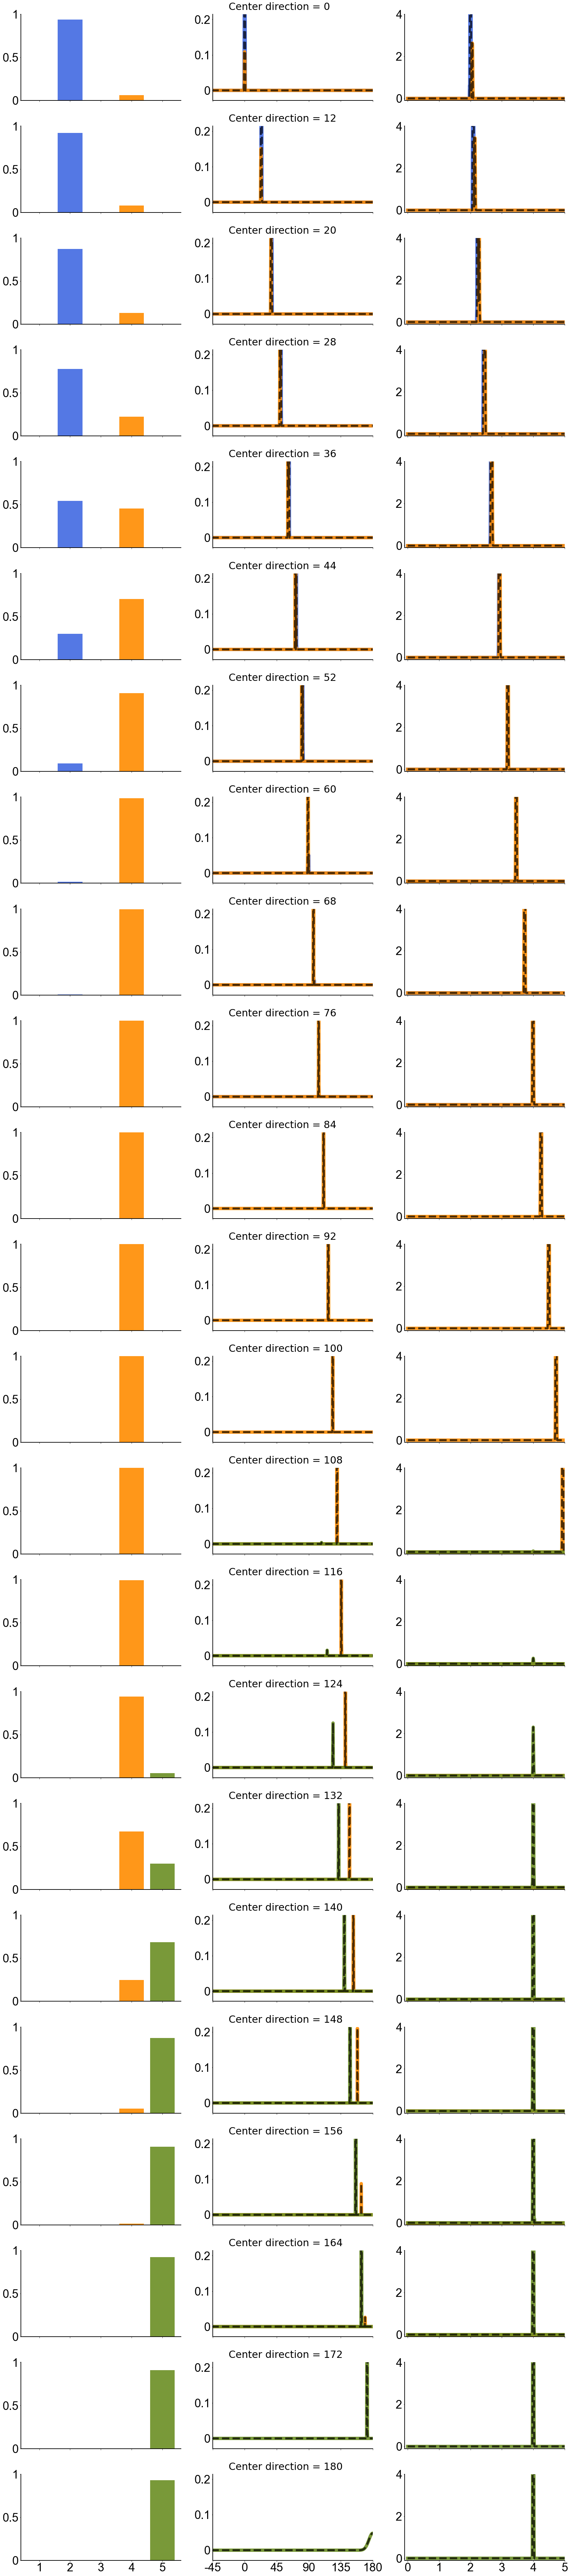

In [8]:

l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
xtck_ = [-180,-135,-90,-45,0,45,90,135,180]
#xtckL = ["-180","-90","0","90","180"]
#tck = [60,90,120,150]
#ytckL = ["-90","-45","0","45","90"]
degree_values = np.linspace(-180, 180,l)
degS = 45#int(np.round(l/2))
#deg45 = deg0+int(np.round(l/8))
x = [45, 48, 51, 57, 68, 78, 79, 80, 90]
x = [45, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
       78, 80, 82, 84, 86, 88, 90]
#x = range(45, 91, 2)
xL = degree_values[x]
x_evalD = np.linspace(-180, 180, num=1000)
x_evalS = np.linspace(0, 6, num=1000)
print("Speed: 7cps")
print("direction: center=45, surround=0")
ms=20
CM = ["Purples", "Blues", "Greens", "Oranges", "Reds"]
colors = ["gold", "royalblue", "seagreen","darkorange","olivedrab"]
cNames = ["CS Integration","CS Segmentation", "Center Reference", "Intermediate Reference", "Independent", "All"]
struct_id = [13,14,15,16,4,0]
_, axs = plt.subplots(len(x), 3, figsize=(figS*4, figS*18))
axs = axs.flatten()
p=0
bw = 0.2
cs,ss = 2,1
for ti,degC in enumerate(x):
    bw=0.03 if degC==90 else 0.2
    for i in range(3):
        ax = axs[p]
        if i==0:
            for c,P in enumerate(struct_all[:-1]):
                z = (np.sum(str_post[:,degC,degS,cs,ss]==struct_id[c])/str_post.shape[0])
                ax.bar(c, z, color=colors[c], alpha=0.9)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["left"].set_linewidth(line_w)
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)
            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(range(len(struct_all)-1))
            ax.xaxis.set_ticklabels(range(1,len(struct_all)))
            ax.yaxis.set_ticks([0,0.5, 1])
            ax.set_ylim(0, 1)
            ax.yaxis.set_ticklabels([0, 0.5, 1])
            ax.set_xlim(-0.6, 4.6)
            if p>(len(x)*3-4):
                ax.xaxis.set_ticklabels(range(1,len(struct_all)))
            else:
                ax.xaxis.set_ticklabels([])
        elif i==1:
            mv = []
            for c,P in enumerate(struct_all[:-1]):
                Y0 = P[0][:,degC,degS,cs,ss]
                Y0[np.isnan(Y0)] = np.random.uniform(-180, 180, sum(np.isnan(Y0)))
                kde = gaussian_kde(Y0, bw_method=bw)
                Y = kde(x_evalD)
                X = x_evalD.copy()
                z = (np.sum(str_post[:,degC,degS,cs,ss]==struct_id[c])/str_post.shape[0])
                M = Y*z
                if z!=0:
                    ax.plot(X,M, '-',  color=colors[c], linewidth=line_w+8, alpha=0.9)
                mv.append(M)
            ax.plot(x_evalD, np.sum(mv, axis=0), '--',  color="k", linewidth=line_w+4, alpha=0.7)
            #ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["left"].set_linewidth(line_w)
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)
            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(xtck_)
            
            if p>(len(x)*3-3):
                ax.xaxis.set_ticklabels(xtck_)
            else:
                ax.xaxis.set_ticklabels([])
            ax.set_xlim(-45, 180)
            # if p in [10,12,14]:
            #     ax.yaxis.set_ticks([0,0.06, 0.12])
            #     ax.set_ylim(-0.015, 0.12)
            #     ax.yaxis.set_ticklabels([0, 0.1, 0.2])
            # else:
            ax.yaxis.set_ticks([0,0.07, 0.14])
            ax.set_ylim(-0.02, 0.15)
            ax.yaxis.set_ticklabels([0, 0.1, 0.2])
            stimType = 'Center direction = '+str(round(xL[ti]))
            ax.annotate(stimType, xy=(0.1,1.05),xycoords='axes fraction',fontsize=f_font1["size"])
        elif i==2:
            ytck = [0,1,2,3,4,5]
            #ytckL = ["0","3","6","9","12"]
            mv = []
            for c,P in enumerate(struct_all[:-1]):
                Y0 = P[1][:,degC,degS,cs,ss].copy()
                if (Y0==0).all():
                    Y0 = np.random.normal(loc=0,scale=0.05,size=2000)
                kde = gaussian_kde(Y0, bw_method=0.2)
                Y = kde(x_evalS)
                X = x_evalS.copy()
                z = (np.sum(str_post[:,degC,degS,cs,ss]==struct_id[c])/str_post.shape[0])
                M = Y*z
                if z!=0:
                    ax.plot(X,M, '-',  color=colors[c], linewidth=line_w+8, alpha=0.9)
                mv.append(M)
            ax.plot(x_evalS, np.sum(mv, axis=0), '--',  color="k", linewidth=line_w+4, alpha=0.7)
            #ax.plot([3,3.15,3.4,3.8],np.zeros(4)+0.003,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
            #ax.plot([12,15],np.zeros(2), "-", color="royalblue", linewidth=line_w+6)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["left"].set_linewidth(line_w)
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)
            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(ytck)
            ax.yaxis.set_ticks([0,2,4])
            if p>(len(x)*3-2):
                ax.xaxis.set_ticklabels(ytck)
            else:
                ax.xaxis.set_ticklabels([])
            ax.set_xlim(-0.1, 5)
            ax.set_ylim(-0.1, 4)
            ax.yaxis.set_ticklabels([0, 2, 4])
        p+=1
    #ax.set_xlabel(" ")
    #ax.set_ylabel(L[i], **f_font2)
    #plt.tight_layout()
plt.tight_layout(h_pad=4, w_pad=4)
plt.savefig(sp+"MixPostDir_subj1_rel_surr0.pdf")
plt.show()

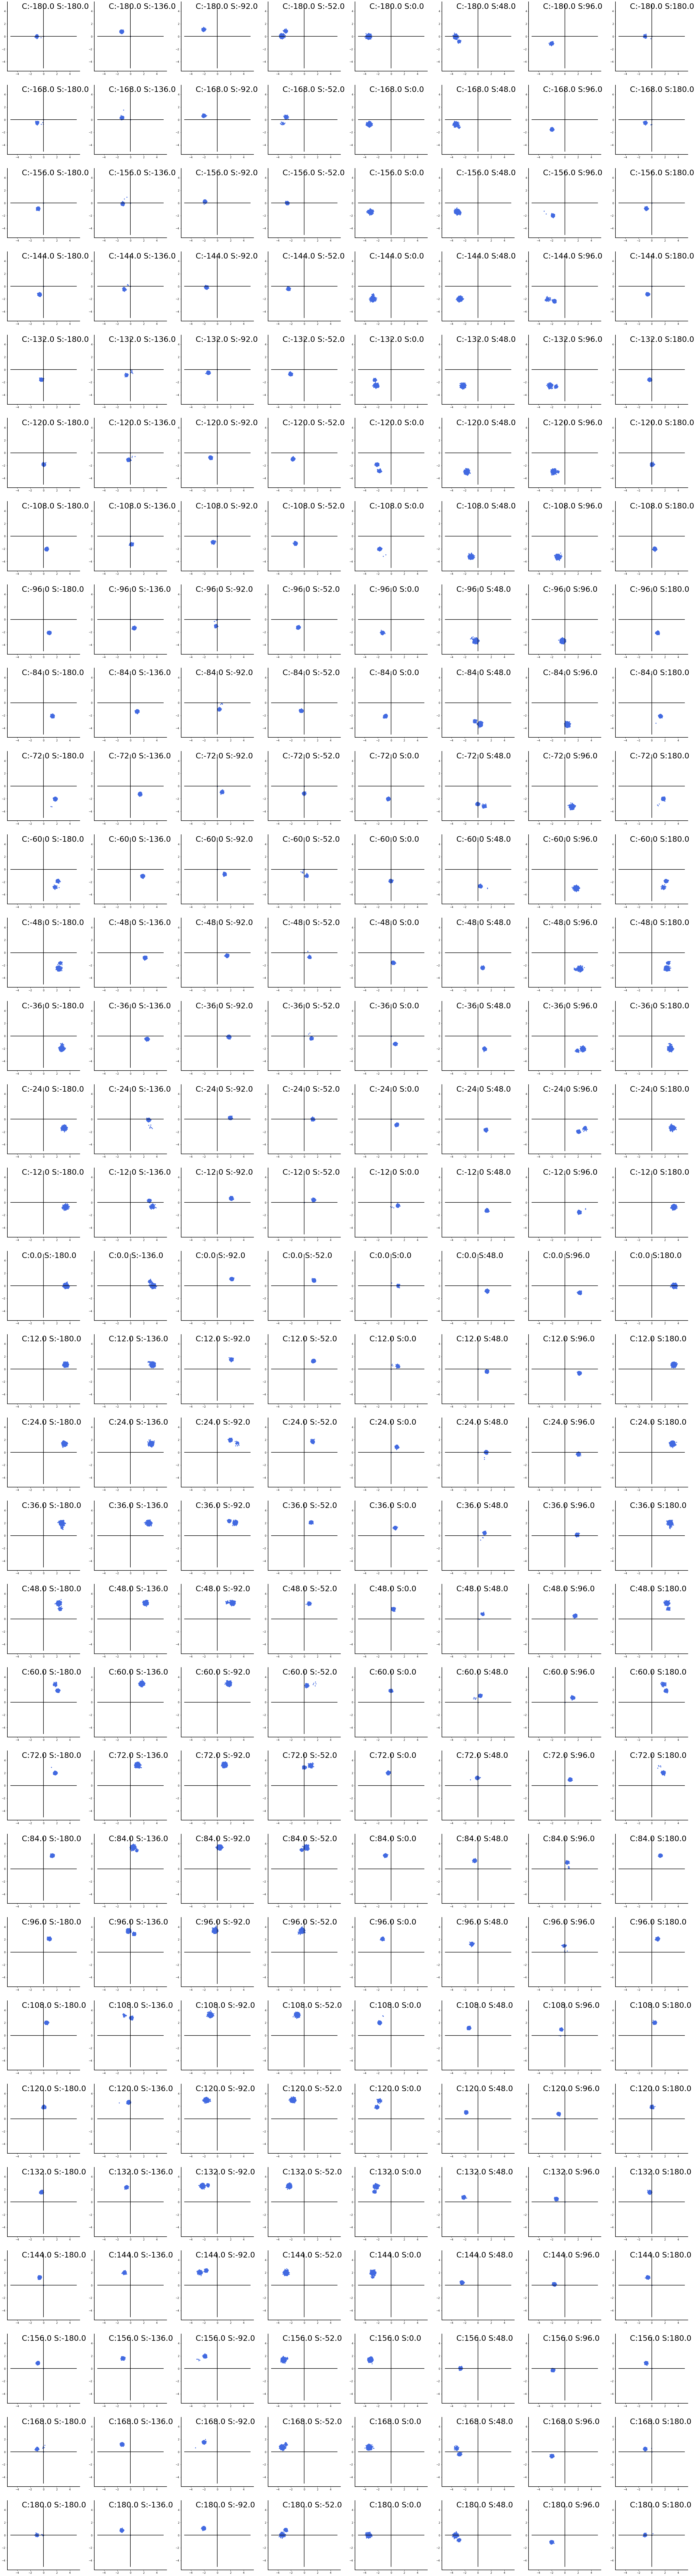

In [ ]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
xtck_ = [-180,-90,0,90,180]
xtckL = ["-180","-90","0","90","180"]
transformed_values = ((np.arange(l) - 45) / 45) * 180
x2 = [0,11,22,32,45,57,69,90]
x1 = range(0, l, 3)
_, axs = plt.subplots(len(x1), 8, figsize=(figS*8, figS*len(x1)))
axs = axs.flatten()
p=0
t=0
for d1 in x1:
    for d2 in x2:
        ax = axs[t]
        ax.plot(vel_post[0,:,d1,d2,2,2], vel_post[1,:,d1,d2,2,2], ".",  color="royalblue")
        ax.plot([0,0], [-5,5], "k", linewidth=line_w)
        ax.plot([-5,5], [0,0], "k", linewidth=line_w)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_linewidth(line_w)
        ax.spines["bottom"].set_linewidth(line_w)
        ax.spines["left"].set_linewidth(line_w)
        #ax.set_xlim(-5, 5)
        #ax.set_ylim(-5, 5)
        ax.grid(False)
        ax.annotate("C:"+str(np.round(transformed_values[d1]))+" "+"S:"+str(np.round(transformed_values[d2])), xy=(0.2,0.9),xycoords='axes fraction',fontsize=f_font1["size"])
        t+=1
plt.savefig(sp+"AllPostVel_subj2_rel_scl1.pdf")
plt.show()


In [25]:
dir_post[:,degC,degS,2,2]

array([-31.59337189, -28.999566  , -31.36725298, -30.82362228,
       -31.77139822, -36.86142115, -29.50316479, -27.69875276,
       -24.3723639 , -36.84596436, -28.78723497, -29.97603719,
       -32.11772473, -25.72393167, -24.68781355, -29.43128928,
       -25.79370998, -34.82706567, -26.77076377, -30.30028937,
       -29.851244  , -25.30819738, -35.9138725 , -35.47925237,
       -26.64671278, -27.92948357, -30.11860542, -32.7936914 ,
       -30.60925602, -32.26892944, -34.67191839, -29.5304672 ,
       -26.37731926, -24.70141849, -30.47515728, -32.48101382,
       -32.47720697, -28.01948084, -31.90767374, -30.75776135,
       -20.99430627, -33.68473299, -29.33420284, -32.71960212,
       -27.20991817, -26.5722827 , -33.52249317, -33.60847393,
       -35.13064889, -30.53152517, -30.2727791 , -25.59861296,
       -30.4670789 , -30.45290305, -35.09012133, -24.72477475,
       -34.53095964, -33.3985393 , -33.3689756 , -29.58372494,
       -28.05195749, -32.12968146, -31.34378244, -22.07

-7.929984386404722 -174.9530526501365
-177.83783783783784 177.8378378378378


NameError: name 'transformed_values' is not defined

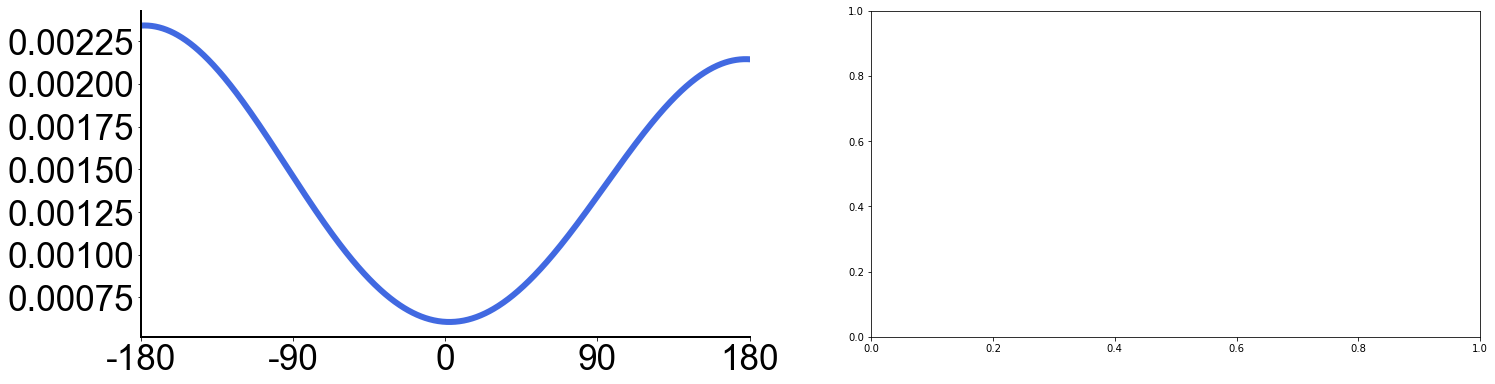

In [15]:
_, axs = plt.subplots(1, 2, figsize=(figS*4, figS))
axs = axs.flatten()
degC,degS = 90,45
xtck_ = [-180,-90,0,90,180]
xtckL = ["-180","-90","0","90","180"]
for i in range(2):
    ax = axs[i]
    if i==0:
        x_eval = np.linspace(-180, 180, num=1000)
        Y0 = dir_post[:,degC,degS,2,2]
        print(np.mean(Y0), np.median(Y0))
        Y0[np.isnan(Y0)] = np.random.uniform(-180, 180, sum(np.isnan(Y0)))
        kde = gaussian_kde(Y0, bw_method=0.5)
        Y = kde(x_eval)
        X = x_eval.copy()
        print(X[np.argmax(Y)],X[np.argmax(Y[900:])+900])
        ax.plot(X,Y,  color="royalblue", linewidth=line_w+4)
        #ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_linewidth(line_w)
        ax.spines["bottom"].set_linewidth(line_w)
        ax.spines["left"].set_linewidth(line_w)
        ax.grid(False)
        for label in (ax.get_xticklabels()+ax.get_yticklabels()):
            label.set_fontname(f_font1["fontname"])
            label.set_fontsize(35)
        ax.xaxis.set_ticks(xtck_)
        ax.xaxis.set_ticklabels(xtckL)
        ax.set_xlim(-180, 180)
        ax.annotate("C:"+str(np.round(transformed_values[degC]))+" "+"S:"+str(np.round(transformed_values[degS])), xy=(0.6,0.9),xycoords='axes fraction',fontsize=f_font1["size"])
    else:
        ytck = [0,1,2,3,4]
        #ytckL = ["0","3","6","9","12"]
        x_eval = np.linspace(0, 6, num=1000)
        Z=spd_post[:,degC,degS,2,2]
        print(np.mean(Z), np.median(Z))
        kde = gaussian_kde(Z)
        Y = kde(x_eval)
        X = x_eval.copy()
        print(X[np.argmax(Y)],X[np.argmax(Y[:480])])
        ax.plot(X,Y,  color="royalblue", linewidth=line_w+4)
        #ax.plot([3,3.15,3.4,3.8],np.zeros(4)+0.003,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
        #ax.plot([12,15],np.zeros(2), "-", color="royalblue", linewidth=line_w+6)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_linewidth(line_w)
        ax.spines["bottom"].set_linewidth(line_w)
        ax.spines["left"].set_linewidth(line_w)
        ax.grid(False)
        for label in (ax.get_xticklabels()+ax.get_yticklabels()):
            label.set_fontname(f_font1["fontname"])
            label.set_fontsize(35)
        ax.xaxis.set_ticks(ytck)
        ax.yaxis.set_ticks([0,2,4])
        ax.xaxis.set_ticklabels(ytck)
        ax.set_xlim(-0.1, 4)
        ax.set_ylim(-0.1, 4)
        ax.yaxis.set_ticklabels([0, 2, 4])
plt.show()

Speed: 7cps
direction: center=45, surround=0


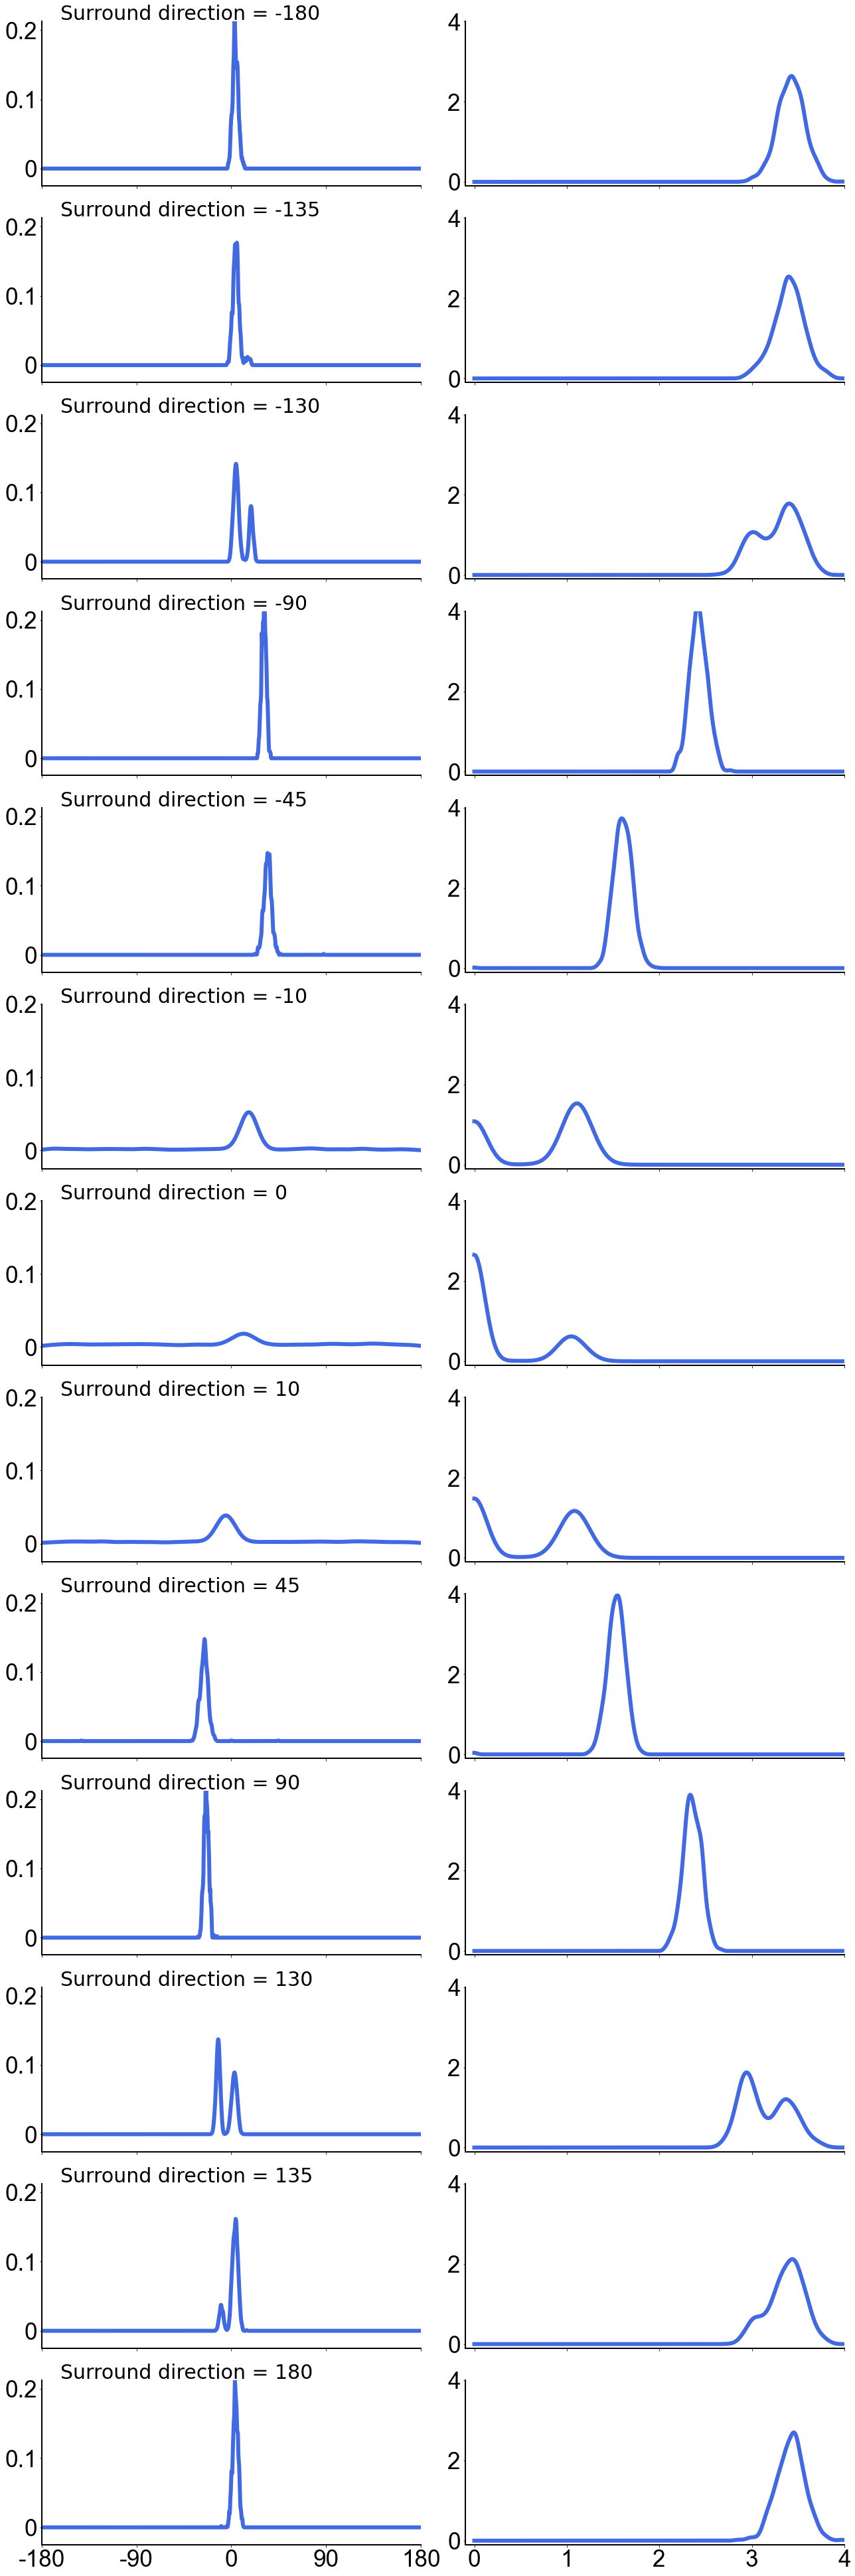

In [10]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
xtck_ = [-180,-90,0,90,180]
xtckL = ["-180","-90","0","90","180"]
#ytck = [60,90,120,150]
#ytckL = ["-90","-45","0","45","90"]

degS = int(np.round(l/2))
deg45 = deg0+int(np.round(l/8))
x = [2, 11, 13, 23, 34, 43, 45, 48, 57, 68, 78, 80,88]
xL = [-180,-135,-130,-90,-45,-10,0,10,45,90,130,135,180]
print("Speed: 7cps")
print("direction: center=45, surround=0")
ms=20
CM = ["Purples", "Blues", "Greens", "Oranges", "Reds"]
_, axs = plt.subplots(len(x), 2, figsize=(figS*3, figS*9))
axs = axs.flatten()
p=0
for ti,degC in enumerate(x):
    for i in range(2):
        ax = axs[p]
        if i==0:
            x_eval = np.linspace(-180, 180, num=1000)
            Y0 = dir_post[:,degS,degC,2,2]
            Y0[np.isnan(Y0)] = np.random.uniform(-180, 180, sum(np.isnan(Y0)))
            kde = gaussian_kde(Y0, bw_method=0.1)
            Y = kde(x_eval)
            X = x_eval.copy()
            
            ax.plot(X,Y,  color="royalblue", linewidth=line_w+4)
            #ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["left"].set_linewidth(line_w)
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)
            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(xtck_)
            
            if p>23:
                ax.xaxis.set_ticklabels(xtckL)
            else:
                ax.xaxis.set_ticklabels([])
            ax.set_xlim(-180, 180)
            if p in [10,12,14]:
                ax.yaxis.set_ticks([0,0.06, 0.12])
                ax.set_ylim(-0.015, 0.12)
                ax.yaxis.set_ticklabels([0, 0.1, 0.2])
            else:
                ax.yaxis.set_ticks([0,0.08, 0.16])
                ax.set_ylim(-0.02, 0.17)
                ax.yaxis.set_ticklabels([0, 0.1, 0.2])
            stimType = 'Surround direction = '+str(xL[ti])
            ax.annotate(stimType, xy=(0.05,1.01),xycoords='axes fraction',fontsize=f_font1["size"])
        else:
            ytck = [0,1,2,3,4]
            #ytckL = ["0","3","6","9","12"]
            x_eval = np.linspace(0, 6, num=1000)
            kde = gaussian_kde(spd_post[:,degS,degC,2,2])
            Y = kde(x_eval)
            X = x_eval.copy()
            ax.plot(X,Y,  color="royalblue", linewidth=line_w+4)
            #ax.plot([3,3.15,3.4,3.8],np.zeros(4)+0.003,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
            #ax.plot([12,15],np.zeros(2), "-", color="royalblue", linewidth=line_w+6)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["left"].set_linewidth(line_w)
            ax.spines["bottom"].set_linewidth(line_w)
            ax.spines["left"].set_linewidth(line_w)
            ax.grid(False)
            for label in (ax.get_xticklabels()+ax.get_yticklabels()):
                label.set_fontname(f_font1["fontname"])
                label.set_fontsize(35)
            ax.xaxis.set_ticks(ytck)
            ax.yaxis.set_ticks([0,2,4])
            if p>23:
                ax.xaxis.set_ticklabels(ytck)
            else:
                ax.xaxis.set_ticklabels([])
            ax.set_xlim(-0.1, 4)
            ax.set_ylim(-0.1, 4)
            ax.yaxis.set_ticklabels([0, 2, 4])
        p+=1
    #ax.set_xlabel(" ")
    #ax.set_ylabel(L[i], **f_font2)
    #plt.tight_layout()
    #plt.savefig(sp+"1PostDir_subj2_rel.pdf")
plt.tight_layout(h_pad=2)
plt.show()

Speed: 7cps
direction: center=45, surround=0


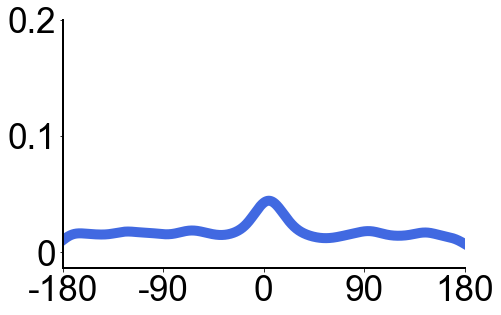

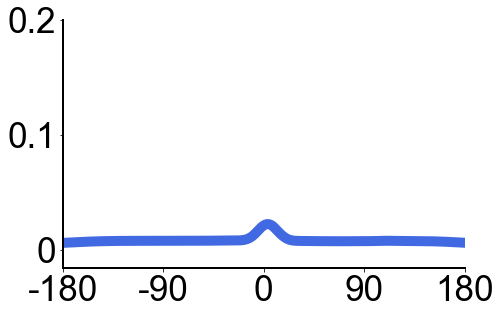

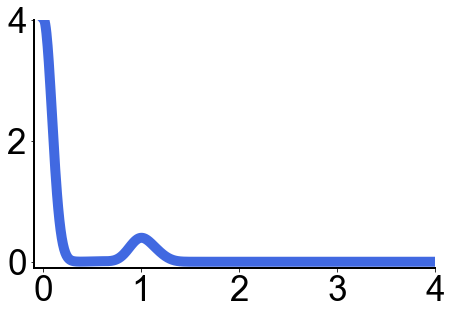

-0.5681070933156718 1.7521610746104355
-0.7530027046839829 0.910384545417549


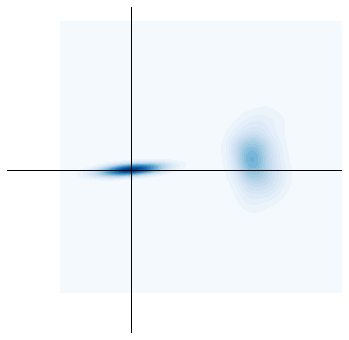

-0.5681070933156718 1.7521610746104355
-0.7530027046839829 0.910384545417549


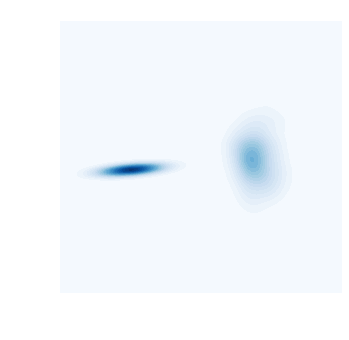

-0.5681070933156718 1.7521610746104355
-0.7530027046839829 0.910384545417549


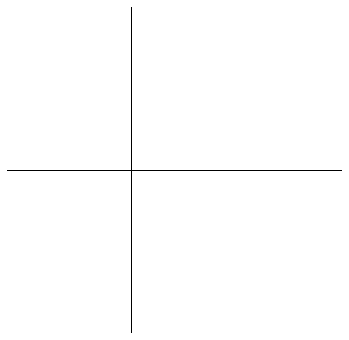

In [23]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
xtck_ = [-180,-90,0,90,180]
xtckL = ["-180","-90","0","90","180"]
#ytck = [60,90,120,150]
#ytckL = ["-90","-45","0","45","90"]
x_eval = np.linspace(-180, 180, num=1000)
deg0 = int(np.round(l/2))
deg45 = deg0+int(np.round(l/8))
print("Speed: 7cps")
print("direction: center=45, surround=0")
ms=20
CM = ["Purples", "Blues", "Greens", "Oranges", "Reds"]
_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
Y0 = dir_post[:,deg0,deg0,2,2]
Y0[np.isnan(Y0)] = np.random.uniform(-180, 180, sum(np.isnan(Y0)))
kde = gaussian_kde(Y0, bw_method=0.1)
Y = kde(x_eval)
X = x_eval.copy()
ax.plot(X,Y,  color="royalblue", linewidth=line_w+8)
#ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(xtck_)
ax.yaxis.set_ticks([0,0.015, 0.03])
ax.xaxis.set_ticklabels(xtckL)
ax.set_xlim(-180, 180)
ax.set_ylim(-0.002, 0.03)
ax.yaxis.set_ticklabels([0, 0.1, 0.2])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostDir_subj2_rel.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
x=vel_post[0,:,deg0,deg0,2,2]
y=vel_post[1,:,deg0,deg0,2,2]
ix = (x==0) & (y==0)
notix = np.logical_not(ix)
Y0 = np.random.uniform(-180, 180, sum(ix))
Y1 = np.arctan2(y[notix], x[notix])*180/np.pi
# plt.plot(x[notix], y[notix], "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
# plt.show()
# plt.plot(Y1, "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
# plt.show()
kde1 = gaussian_kde(Y0)
Y0 = kde1(x_eval)
kde2 = gaussian_kde(Y1)
Y1 = kde2(x_eval)
X = x_eval.copy()
#ax.plot(X,Y1,  color="royalblue", linewidth=line_w+8)
ax.plot(X,(0.2*Y1+0.8*Y0)+0.003,  color="royalblue", linewidth=line_w+8)
#ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(xtck_)
ax.yaxis.set_ticks([0,0.065, 0.13])
ax.xaxis.set_ticklabels(xtckL)
ax.set_xlim(-180, 180)
ax.set_ylim(-0.01, 0.13)
ax.yaxis.set_ticklabels([0, 0.1, 0.2])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostDir_subj2_rel.pdf")
plt.show()

#l = dir_post.shape[1]
#xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
ytck = [0,1,2,3,4]
#ytckL = ["0","3","6","9","12"]
x_eval = np.linspace(0, 6, num=1000)
_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
kde = gaussian_kde(spd_post[:,deg0,deg0,2,2])
Y = kde(x_eval)
X = x_eval.copy()
ax.plot(X,Y,  color="royalblue", linewidth=line_w+8)
#ax.plot([3,3.15,3.4,3.8],np.zeros(4)+0.003,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
#ax.plot([12,15],np.zeros(2), "-", color="royalblue", linewidth=line_w+6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(ytck)
ax.yaxis.set_ticks([0,2,4])
ax.xaxis.set_ticklabels(ytck)
ax.set_xlim(-0.1, 4)
ax.set_ylim(-0.1, 4)
ax.yaxis.set_ticklabels([0, 2, 4])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostSpd_subj2_rel.pdf")
plt.show()

x=vel_post[0,:,deg0,deg0,2,2]
y=vel_post[1,:,deg0,deg0,2,2]
D = np.vstack([x[x!=0], y[y!=0]])
kde1 = gaussian_kde(D,bw_method=0.5)
D = np.vstack([x, y])
kde2 = gaussian_kde(D,bw_method=0.5)
# Define grid range based on the data
e = 0.5
x_min, x_max = x.min() - e, x.max() + e
y_min, y_max = y.min() - e, y.max() + e
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
grid_coords = np.vstack([xx.ravel(), yy.ravel()])
zz1 = kde1(grid_coords).reshape(xx.shape)
zz2 = kde2(grid_coords).reshape(xx.shape)
_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-1., 1.7]
yl = [-1., 1.]
# tk = 0.5
# range_ = 0.5
# d=range_/10
# ax.plot([-tk,-tk],[-d,d], "-", color="k", linewidth=line_w)
# ax.plot([-d,d],[-tk,-tk], "-", color="k", linewidth=line_w)
# ax.plot([tk,tk],[-d,d], "-", color="k", linewidth=line_w)
# ax.plot([-d,d],[tk,tk], "-", color="k", linewidth=line_w)
ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
ax.contourf(xx, yy, zz1*0.63 + zz2*0.37, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"post1.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-1., 1.7]
yl = [-1., 1.]
# tk = 0.5
# range_ = 0.5
# d=range_/10
# ax.plot([-tk,-tk],[-d,d], "-", color="k", linewidth=line_w)
# ax.plot([-d,d],[-tk,-tk], "-", color="k", linewidth=line_w)
# ax.plot([tk,tk],[-d,d], "-", color="k", linewidth=line_w)
# ax.plot([-d,d],[tk,tk], "-", color="k", linewidth=line_w)
#ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
#ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
ax.contourf(xx, yy, zz1*0.63 + zz2*0.37, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"post1.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-1., 1.7]
yl = [-1., 1.]
# tk = 0.5
# range_ = 0.5
# d=range_/10
# ax.plot([-tk,-tk],[-d,d], "-", color="k", linewidth=line_w)
# ax.plot([-d,d],[-tk,-tk], "-", color="k", linewidth=line_w)
# ax.plot([tk,tk],[-d,d], "-", color="k", linewidth=line_w)
# ax.plot([-d,d],[tk,tk], "-", color="k", linewidth=line_w)
ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
#ax.contourf(xx, yy, zz1*0.63 + zz2*0.37, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"post1.pdf")
plt.show()

Speed: 7cps
direction: center=45, surround=0


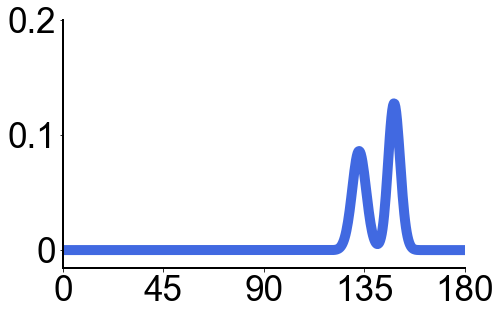

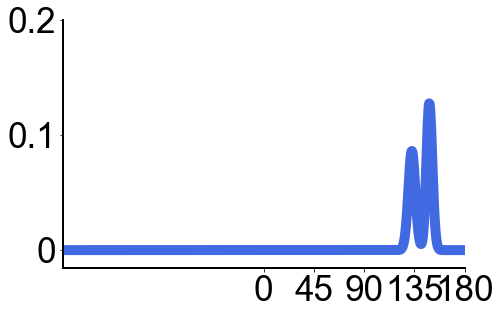

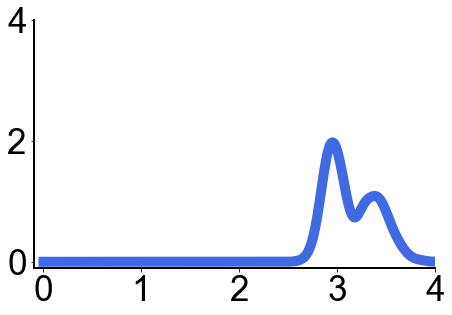

-3.2908255648424203 -1.3953139041912268
0.8024641354399136 3.400045905166224


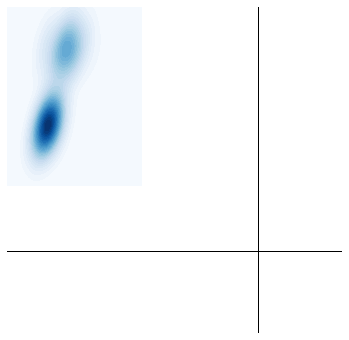

-3.2908255648424203 -1.3953139041912268
0.8024641354399136 3.400045905166224


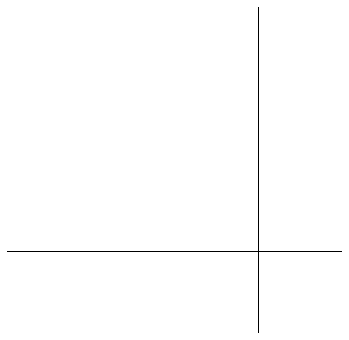

-3.2908255648424203 -1.3953139041912268
0.8024641354399136 3.400045905166224


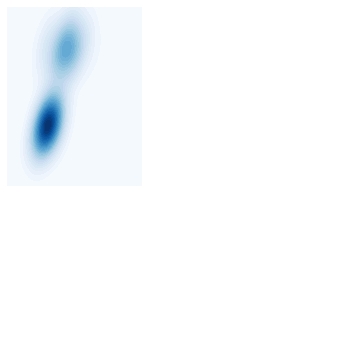

In [24]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
xtck_ = [0,45,90,135,180]
xtckL = ["-180","-90","0","90","180"]
#ytck = [60,90,120,150]
#ytckL = ["-90","-45","0","45","90"]
x_eval = np.linspace(-180, 180, num=1000)
deg0 = int(np.round(l/2))
deg45 = deg0+int(np.round(l/4))+int(np.round(l/8))-2
print("Speed: 7cps")
print("direction: center=45, surround=0")
ms=20
CM = ["Purples", "Blues", "Greens", "Oranges", "Reds"]
_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
Y0 = dir_post[:,deg45,deg0,2,2]
Y0[np.isnan(Y0)] = np.random.uniform(-180, 180, sum(np.isnan(Y0)))
kde = gaussian_kde(Y0)
Y = kde(x_eval)
X = x_eval.copy()
ax.plot(X,Y,  color="royalblue", linewidth=line_w+8)
#ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(xtck_)
ax.yaxis.set_ticks([0,0.065, 0.13])
ax.xaxis.set_ticklabels(xtck_)
ax.set_xlim(0, 180)
ax.set_ylim(-0.01, 0.13)
ax.yaxis.set_ticklabels([0, 0.1, 0.2])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostDir_subj2_rel.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
x=vel_post[0,:,deg45,deg0,2,2]
y=vel_post[1,:,deg45,deg0,2,2]
ix = (x==0) & (y==0)
notix = np.logical_not(ix)
#Y0 = np.random.uniform(-180, 180, sum(ix))
Y1 = np.arctan2(y[notix], x[notix])*180/np.pi
# plt.plot(x[notix], y[notix], "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
# plt.show()
# plt.plot(Y1, "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
# plt.show()
#kde1 = gaussian_kde(Y0)
#Y0 = kde1(x_eval)
kde2 = gaussian_kde(Y1)
Y1 = kde2(x_eval)
X = x_eval.copy()
#ax.plot(X,Y1,  color="royalblue", linewidth=line_w+8)
ax.plot(X,Y1,  color="royalblue", linewidth=line_w+8)
#ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(xtck_)
ax.yaxis.set_ticks([0,0.065, 0.13])
ax.xaxis.set_ticklabels(xtck_)
ax.set_xlim(-180, 180)
ax.set_ylim(-0.01, 0.13)
ax.yaxis.set_ticklabels([0, 0.1, 0.2])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostDir_subj2_rel.pdf")
plt.show()

#l = dir_post.shape[1]
#xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
ytck = [0,1,2,3,4]
#ytckL = ["0","3","6","9","12"]
x_eval = np.linspace(0, 6, num=1000)
_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
kde = gaussian_kde(spd_post[:,deg45,deg0,2,2])
Y = kde(x_eval)
X = x_eval.copy()
ax.plot(X,Y,  color="royalblue", linewidth=line_w+8)
#ax.plot([3,3.15,3.4,3.8],np.zeros(4)+0.003,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
#ax.plot([12,15],np.zeros(2), "-", color="royalblue", linewidth=line_w+6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(ytck)
ax.yaxis.set_ticks([0,2,4])
ax.xaxis.set_ticklabels(ytck)
ax.set_xlim(-0.1, 4)
ax.set_ylim(-0.1, 4)
ax.yaxis.set_ticklabels([0, 2, 4])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostSpd_subj2_rel.pdf")
plt.show()

x=vel_post[0,:,deg45,deg0,2,2]
y=vel_post[1,:,deg45,deg0,2,2]
#D = np.vstack([x[x!=0], y[y!=0]])
#kde1 = gaussian_kde(D,bw_method=0.5)
D = np.vstack([x, y])
kde2 = gaussian_kde(D,bw_method=0.5)
# Define grid range based on the data
e = 0.5
x_min, x_max = x.min() - e, x.max() + e
y_min, y_max = y.min() - e, y.max() + e
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
grid_coords = np.vstack([xx.ravel(), yy.ravel()])
#zz1 = kde1(grid_coords).reshape(xx.shape)
zz2 = kde2(grid_coords).reshape(xx.shape)
_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-3, 1]
yl = [-1, 3]
ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"post1.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-3, 1]
yl = [-1, 3]
ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
#ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"post1.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-3, 1]
yl = [-1, 3]
#ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
#ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"post1.pdf")
plt.show()

Speed: 7cps
direction: center=45, surround=0


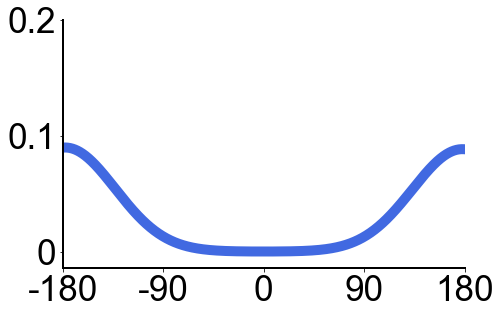

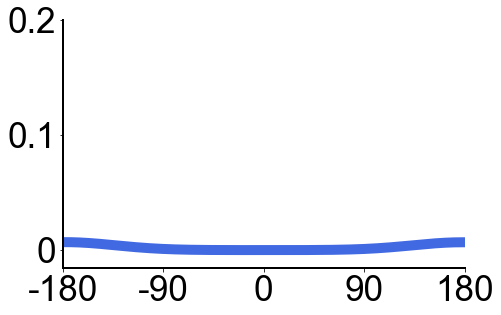

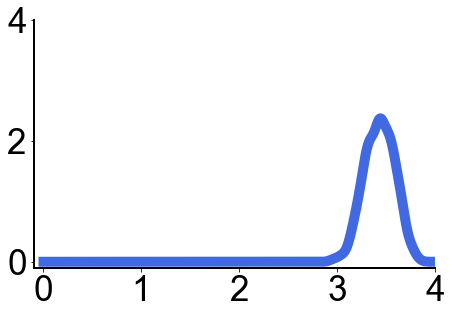

-4.3333728242079586 -2.4419714618562742
-1.1117803541644316 0.959374417287834


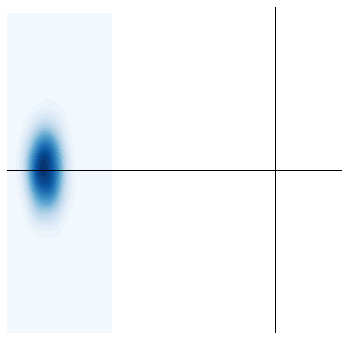

-4.3333728242079586 -2.4419714618562742
-1.1117803541644316 0.959374417287834


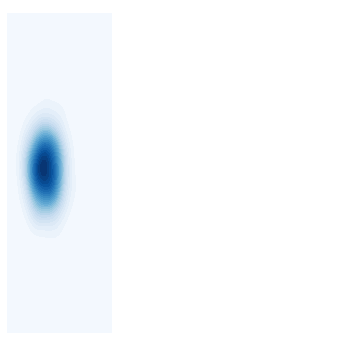

-4.3333728242079586 -2.4419714618562742
-1.1117803541644316 0.959374417287834


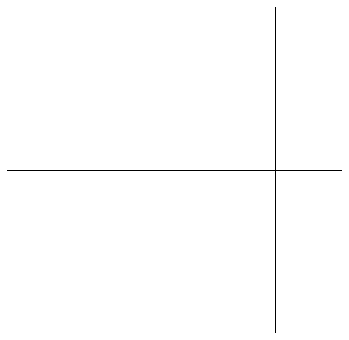

In [25]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
xtck_ = [-180,-90,0,90,180]
xtckL = ["-180","-90","0","90","180"]
#ytck = [60,90,120,150]
#ytckL = ["-90","-45","0","45","90"]
x_eval = np.linspace(-180, 180, num=1000)
deg0 = int(np.round(l/2))
deg45 = l-1
print("Speed: 7cps")
print("direction: center=45, surround=0")
ms=20
CM = ["Purples", "Blues", "Greens", "Oranges", "Reds"]
_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
Y0 = dir_post[:,deg45,deg0,2,2]
Y0[np.isnan(Y0)] = np.random.uniform(-180, 180, sum(np.isnan(Y0)))
kde = gaussian_kde(Y0)
Y = kde(x_eval)
X = x_eval.copy()
ax.plot(X,Y,  color="royalblue", linewidth=line_w+8)
#ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(xtck_)
ax.yaxis.set_ticks([0,0.005, 0.01])
ax.xaxis.set_ticklabels(xtckL)
ax.set_xlim(-180, 180)
ax.set_ylim(-0.0007, 0.01)
ax.yaxis.set_ticklabels([0, 0.1, 0.2])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostDir_subj2_rel.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
x=vel_post[0,:,deg45,deg0,2,2]
y=vel_post[1,:,deg45,deg0,2,2]
ix = (x==0) & (y==0)
notix = np.logical_not(ix)
#Y0 = np.random.uniform(-180, 180, sum(ix))
Y1 = np.arctan2(y[notix], x[notix])*180/np.pi
# plt.plot(x[notix], y[notix], "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
# plt.show()
# plt.plot(Y1, "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
# plt.show()
#kde1 = gaussian_kde(Y0)
#Y0 = kde1(x_eval)
kde2 = gaussian_kde(Y1)
Y1 = kde2(x_eval)
X = x_eval.copy()
#ax.plot(X,Y1,  color="royalblue", linewidth=line_w+8)
ax.plot(X,Y1,  color="royalblue", linewidth=line_w+8)
#ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(xtck_)
ax.yaxis.set_ticks([0,0.065, 0.13])
ax.xaxis.set_ticklabels(xtckL)
ax.set_xlim(-180, 180)
ax.set_ylim(-0.01, 0.13)
ax.yaxis.set_ticklabels([0, 0.1, 0.2])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostDir_subj2_rel.pdf")
plt.show()

#l = dir_post.shape[1]
#xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
ytck = [0,1,2,3,4]
#ytckL = ["0","3","6","9","12"]
x_eval = np.linspace(0, 6, num=1000)
_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
kde = gaussian_kde(spd_post[:,deg45,deg0,2,2])
Y = kde(x_eval)
X = x_eval.copy()
ax.plot(X,Y,  color="royalblue", linewidth=line_w+8)
#ax.plot([3,3.15,3.4,3.8],np.zeros(4)+0.003,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
#ax.plot([12,15],np.zeros(2), "-", color="royalblue", linewidth=line_w+6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(ytck)
ax.yaxis.set_ticks([0,2,4])
ax.xaxis.set_ticklabels(ytck)
ax.set_xlim(-0.1, 4)
ax.set_ylim(-0.1, 4)
ax.yaxis.set_ticklabels([0, 2, 4])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostSpd_subj2_rel.pdf")
plt.show()

x=vel_post[0,:,deg45,deg0,2,2]
y=vel_post[1,:,deg45,deg0,2,2]
#D = np.vstack([x[x!=0], y[y!=0]])
#kde1 = gaussian_kde(D,bw_method=0.5)
D = np.vstack([x, y])
kde2 = gaussian_kde(D,bw_method=0.5)
# Define grid range based on the data
e = 0.5
x_min, x_max = x.min() - e, x.max() + e
y_min, y_max = y.min() - e, y.max() + e
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
grid_coords = np.vstack([xx.ravel(), yy.ravel()])
#zz1 = kde1(grid_coords).reshape(xx.shape)
zz2 = kde2(grid_coords).reshape(xx.shape)
_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-4, 1]
yl = [-1, 1]
ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"post1.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-4, 1]
yl = [-1, 1]
#ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
#ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"post1.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-4, 1]
yl = [-1, 1]
ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
#ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"post1.pdf")
plt.show()


In [15]:
# open the file in read mode
with h5py.File('/Users/glengyel/Projects_data/Neural Predictions/post_vel_relVar_subj2_relstruct.mat', 'r') as file:
    # list all the keys in the root group
    print(list(file.keys()))

    # access a dataset
    vel_post = file['vel_post']
    #print(vel_post.shape)
    vel_post = np.array(vel_post)
    print(vel_post.shape)

    # access a dataset
    dir_post = file['dir_post']
    #print(dir_post.shape)
    dir_post = np.array(dir_post)
    print(dir_post.shape)

    # access a dataset
    spd_post = file['spe_post']
    #print(spd_post.shape)
    spd_post = np.array(spd_post)
    print(spd_post.shape)

['#refs#', '#subsystem#', 'c', 'c_dir', 'c_speed', 'causalStruct', 'dir_post', 'dir_vec', 'gap', 'id1', 'lenCaus', 'len_c', 'len_c_speed', 'len_s', 'len_s_speed', 'model', 'model_params', 'model_type', 'models_all', 'n', 'ndots', 'ndots_all', 'noise', 'ns', 'num_trials', 'point', 's', 's_dir', 's_speed', 'sig_id', 'spe_post', 'speed_vec', 'subid', 'subid_all', 'varType', 'vel_post']
(2, 1000, 91, 91, 5, 5)
(1000, 91, 91, 5, 5)
(1000, 91, 91, 5, 5)


Speed: 7cps
direction: center=45, surround=0


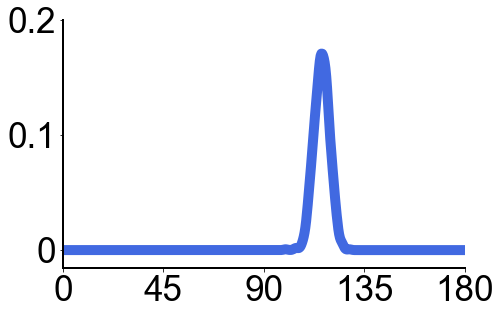

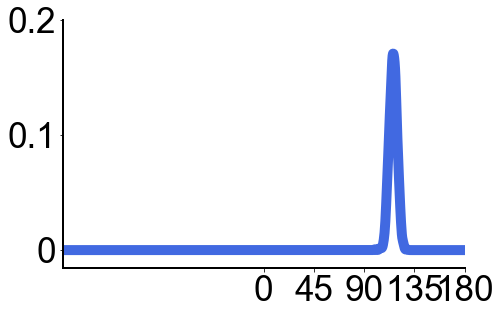

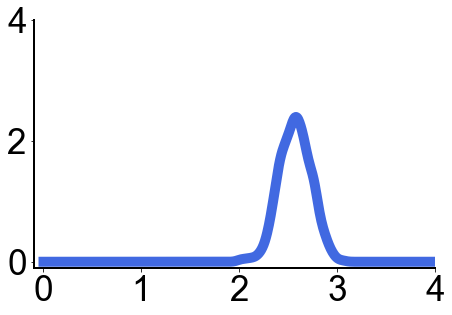

-2.1263197139759837 0.0636446813118145
1.2549731849163888 3.26920557295621


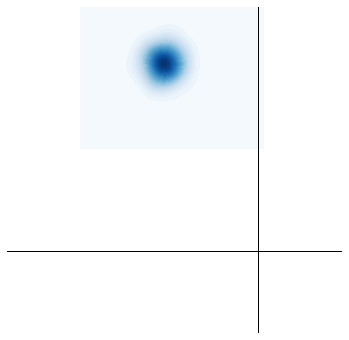

-2.1263197139759837 0.0636446813118145
1.2549731849163888 3.26920557295621


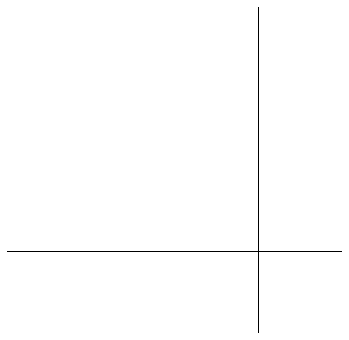

-2.1263197139759837 0.0636446813118145
1.2549731849163888 3.26920557295621


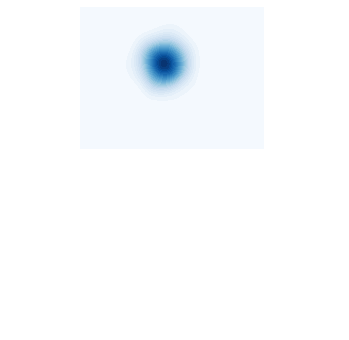

In [21]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
xtck_ = [0,45,90,135,180]
xtckL = ["-180","-90","0","90","180"]
#ytck = [60,90,120,150]
#ytckL = ["-90","-45","0","45","90"]
x_eval = np.linspace(-180, 180, num=1000)
deg0 = int(np.round(l/2))
deg45 = deg0+int(np.round(l/8))
print("Speed: 7cps")
print("direction: center=45, surround=0")
ms=20
CM = ["Purples", "Blues", "Greens", "Oranges", "Reds"]
_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
Y0 = dir_post[:,deg45,deg0,2,2]
Y0[np.isnan(Y0)] = np.random.uniform(-180, 180, sum(np.isnan(Y0)))
kde = gaussian_kde(Y0)
Y = kde(x_eval)
X = x_eval.copy()
ax.plot(X,Y,  color="royalblue", linewidth=line_w+8)
#ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(xtck_)
ax.yaxis.set_ticks([0,0.065, 0.13])
ax.xaxis.set_ticklabels(xtck_)
ax.set_xlim(0, 180)
ax.set_ylim(-0.01, 0.13)
ax.yaxis.set_ticklabels([0, 0.1, 0.2])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostDir_subj2_rel.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
x=vel_post[0,:,deg45,deg0,2,2]
y=vel_post[1,:,deg45,deg0,2,2]
ix = (x==0) & (y==0)
notix = np.logical_not(ix)
#Y0 = np.random.uniform(-180, 180, sum(ix))
Y1 = np.arctan2(y[notix], x[notix])*180/np.pi
# plt.plot(x[notix], y[notix], "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
# plt.show()
# plt.plot(Y1, "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
# plt.show()
#kde1 = gaussian_kde(Y0)
#Y0 = kde1(x_eval)
kde2 = gaussian_kde(Y1)
Y1 = kde2(x_eval)
X = x_eval.copy()
#ax.plot(X,Y1,  color="royalblue", linewidth=line_w+8)
ax.plot(X,Y1,  color="royalblue", linewidth=line_w+8)
#ax.plot([108,115,117,120],np.zeros(4)+0.001,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(xtck_)
ax.yaxis.set_ticks([0,0.065, 0.13])
ax.xaxis.set_ticklabels(xtck_)
ax.set_xlim(-180, 180)
ax.set_ylim(-0.01, 0.13)
ax.yaxis.set_ticklabels([0, 0.1, 0.2])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostDir_subj2_rel.pdf")
plt.show()

#l = dir_post.shape[1]
#xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
ytck = [0,1,2,3,4]
#ytckL = ["0","3","6","9","12"]
x_eval = np.linspace(0, 6, num=1000)
_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
kde = gaussian_kde(spd_post[:,deg45,deg0,2,2])
Y = kde(x_eval)
X = x_eval.copy()
ax.plot(X,Y,  color="royalblue", linewidth=line_w+8)
#ax.plot([3,3.15,3.4,3.8],np.zeros(4)+0.003,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
#ax.plot([12,15],np.zeros(2), "-", color="royalblue", linewidth=line_w+6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(ytck)
ax.yaxis.set_ticks([0,2,4])
ax.xaxis.set_ticklabels(ytck)
ax.set_xlim(-0.1, 4)
ax.set_ylim(-0.1, 4)
ax.yaxis.set_ticklabels([0, 2, 4])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
#plt.tight_layout()
#plt.savefig(sp+"1PostSpd_subj2_rel.pdf")
plt.show()

x=vel_post[0,:,deg45,deg0,2,2]
y=vel_post[1,:,deg45,deg0,2,2]
#D = np.vstack([x[x!=0], y[y!=0]])
#kde1 = gaussian_kde(D,bw_method=0.5)
D = np.vstack([x, y])
kde2 = gaussian_kde(D,bw_method=0.5)
# Define grid range based on the data
e = 0.5
x_min, x_max = x.min() - e, x.max() + e
y_min, y_max = y.min() - e, y.max() + e
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
grid_coords = np.vstack([xx.ravel(), yy.ravel()])
#zz1 = kde1(grid_coords).reshape(xx.shape)
zz2 = kde2(grid_coords).reshape(xx.shape)
_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-3, 1]
yl = [-1, 3]
ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"c4.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-3, 1]
yl = [-1, 3]
ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
#ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"c4.pdf")
plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS, figS))
#y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
xl = [-3, 1]
yl = [-1, 3]
#ax.plot([xl[0], xl[1]],[0,0], "-", color="k", linewidth=line_w-1)
#ax.plot([0,0],[yl[0], yl[1]], "-", color="k", linewidth=line_w-1)
ax.contourf(xx, yy, zz2, levels=30, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.contourf(xx, yy, zz2, levels=20, cmap=CM[1])#,vmin=0, vmax=0.05)

#for vx, vy in zip(x, y):
#    ax.plot(vx, vy, ".", markersize=1, color="k")
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(xl[0], xl[1])
ax.set_ylim(yl[0], yl[1])
print(x_min, x_max)
print(y_min, y_max)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.tight_layout()
#plt.savefig(sp+"c4.pdf")
plt.show()


In [48]:
# open the file in read mode
with h5py.File('/Users/glengyel/Projects_data/Neural Predictions/post_mix_spd.mat', 'r') as file:
    # list all the keys in the root group
    print(list(file.keys()))

    # access a dataset
    spd_post = file['spe_post']
    print(spd_post.shape)
    spd_post = np.array(spd_post)
    print(spd_post.shape)

['spe_post']
(1000, 91, 91, 5, 5, 5)
(1000, 91, 91, 5, 5, 5)


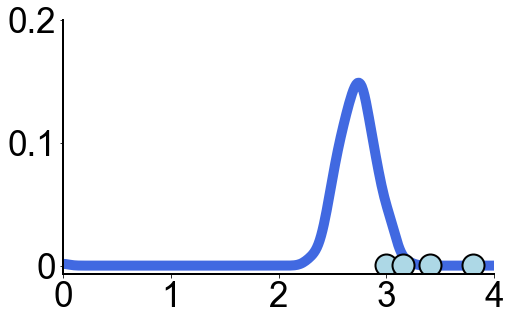

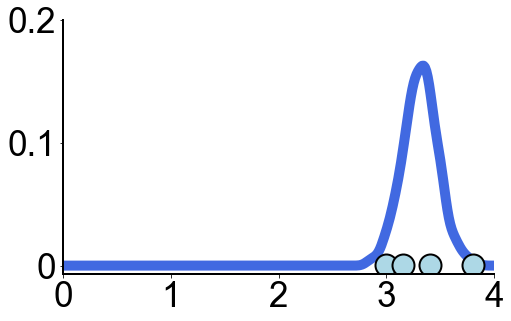

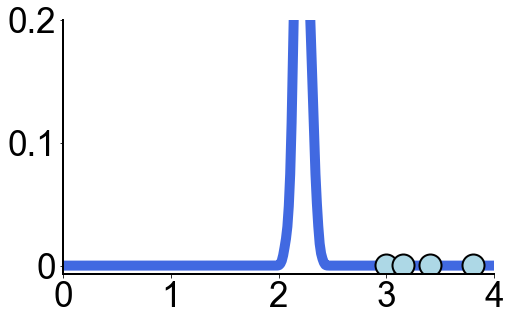

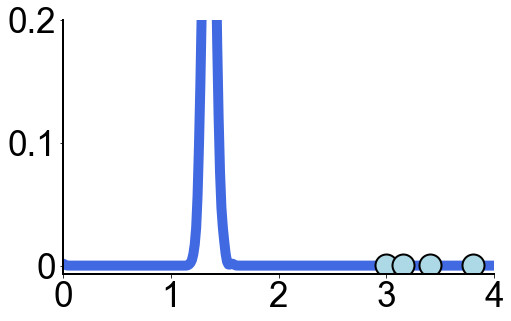

In [52]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
ytck = [0,1,2,3,4]
#ytckL = ["0","3","6","9","12"]
x_eval = np.linspace(0, 13, num=1000)

for c in range(1,5):
    _, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.76))
    kde = gaussian_kde(spd_post[:,deg45,deg0,2,2,c])
    Y = kde(x_eval)
    X = x_eval.copy()
    ax.plot(X,Y,  color="royalblue", linewidth=line_w+8)
    ax.plot([3,3.15,3.4,3.8],np.zeros(4)+0.003,  "o", markersize=line_w+ms,markerfacecolor="lightblue", markeredgecolor="k", markeredgewidth=line_w)
    #ax.plot([12,15],np.zeros(2), "-", color="royalblue", linewidth=line_w+6)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_linewidth(line_w)
    ax.spines["bottom"].set_linewidth(line_w)
    ax.spines["left"].set_linewidth(line_w)
    ax.grid(False)
    for label in (ax.get_xticklabels()+ax.get_yticklabels()):
        label.set_fontname(f_font1["fontname"])
        label.set_fontsize(35)
    ax.xaxis.set_ticks(ytck)
    ax.yaxis.set_ticks([0,1.5, 3])
    ax.xaxis.set_ticklabels(ytck)
    ax.set_xlim(0, 4)
    ax.set_ylim(-0.1, 3)
    ax.yaxis.set_ticklabels([0, 0.1, 0.2])
    #ax.set_xlabel(" ")
    #ax.set_ylabel(L[i], **f_font2)
    plt.tight_layout()
    plt.savefig(sp+"1PostSpd_subj2_rel.pdf")
    plt.show()

In [ ]:
np.where((Y>0.6) & (Y<0.8))[0]

array([384, 385, 386, 387, 388, 389, 414, 415, 416, 417, 418, 419, 450,
       451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463,
       464, 465, 466, 467, 468])

In [ ]:
Y[np.where((Y>0.6) & (Y<0.8))[0]]

array([0.62385195, 0.66059308, 0.69672622, 0.73197251, 0.76605654,
       0.79871056, 0.77591734, 0.74490434, 0.7134402 , 0.68192307,
       0.65075934, 0.62035332, 0.60362026, 0.61439418, 0.62420004,
       0.63292584, 0.64047477, 0.64676669, 0.65173917, 0.65534809,
       0.65756771, 0.65839028, 0.65782515, 0.65589737, 0.65264591,
       0.64812149, 0.64238413, 0.63550045, 0.62754091, 0.61857699,
       0.60867851])

Speed: 7cps
direction: center=0, surround= -125


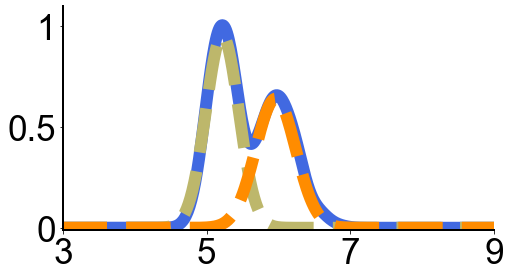

5.218218218218218 5.95995995995996


In [ ]:


l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
ytck = [3,5,7,9]
ytckL = ["0","3","6","9","12"]
x_eval = np.linspace(0, 13, num=1000)
deg45 = int(np.round(l/2))
x = np.arange(2,l-2,4)
xL = [str(round(i)) for i in x*360/l-180]
_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.66))
kde = gaussian_kde(spd_post[:,deg45,x[3],2,2,1])
print("Speed: 7cps")
print("direction: center=0, surround=", xL[3])
Y = kde(x_eval)
X = x_eval.copy()
ax.plot(X,Y,  color="royalblue", linewidth=line_w+10)
yy = norm.pdf(x_eval, loc=X[np.argmax(Y)], scale=.23)
ax.plot(X,yy*0.55, "--", color="darkkhaki", linewidth=line_w+10)
yy = norm.pdf(x_eval, loc=X[458], scale=.28)
ax.plot(X,yy*0.45, "--", color="darkorange", linewidth=line_w+10)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(ytck)
ax.yaxis.set_ticks([0,0.5, 1])
ax.xaxis.set_ticklabels(ytck)
ax.set_xlim(3, 9)
ax.set_ylim(-0.01, 1.1)
ax.yaxis.set_ticklabels([0,0.5, 1])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
plt.tight_layout()
plt.savefig(sp+"1PostSpd_mix_subj2_rel.pdf")
plt.show()
print(X[np.argmax(Y)], X[458])

Speed: 7cps
direction: center=0, surround= -125


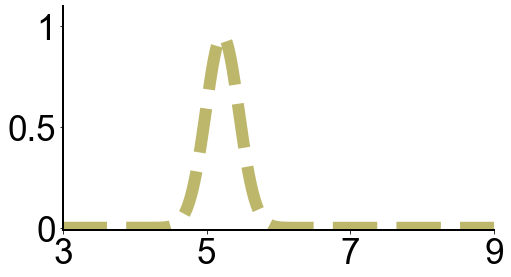

In [ ]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
ytck = [3,5,7,9]
ytckL = ["0","3","6","9","12"]
x_eval = np.linspace(0, 13, num=1000)
deg45 = int(np.round(l/2))
x = np.arange(2,l-2,4)
xL = [str(round(i)) for i in x*360/l-180]
_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.66))
kde = gaussian_kde(spd_post[:,deg45,x[3],2,2,1])
print("Speed: 7cps")
print("direction: center=0, surround=", xL[3])
Y = kde(x_eval)
X = x_eval.copy()
#ax.plot(X,Y,  color="royalblue", linewidth=line_w+5)
yy = norm.pdf(x_eval, loc=X[np.argmax(Y)], scale=.23)
ax.plot(X,yy*0.55, "--", color="darkkhaki", linewidth=line_w+10)
#yy = norm.pdf(x_eval, loc=X[458], scale=.28)
#ax.plot(X,yy*0.45, "--", color="darkorange", linewidth=line_w+5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(ytck)
ax.yaxis.set_ticks([0,0.5, 1])
ax.xaxis.set_ticklabels(ytck)
ax.set_xlim(3, 9)
ax.set_ylim(-0.01, 1.1)
ax.yaxis.set_ticklabels([0,0.5, 1])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
plt.tight_layout()
plt.savefig(sp+"1PostSpd_mix1_subj2_rel.pdf")
plt.show()

Speed: 7cps
direction: center=0, surround= -125


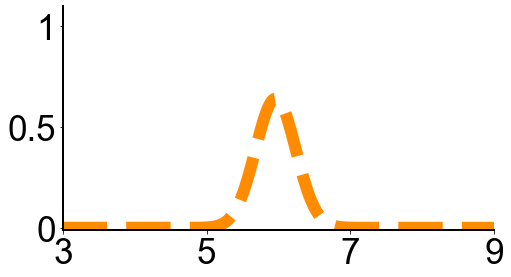

In [ ]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
ytck = [3,5,7,9]
ytckL = ["0","3","6","9","12"]
x_eval = np.linspace(0, 13, num=1000)
deg45 = int(np.round(l/2))
x = np.arange(2,l-2,4)
xL = [str(round(i)) for i in x*360/l-180]
_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS*.66))
kde = gaussian_kde(spd_post[:,deg45,x[3],2,2,1])
print("Speed: 7cps")
print("direction: center=0, surround=", xL[3])
Y = kde(x_eval)
X = x_eval.copy()
#ax.plot(X,Y,  color="royalblue", linewidth=line_w+5)
#yy = norm.pdf(x_eval, loc=X[np.argmax(Y)], scale=.23)
#ax.plot(X,yy*0.55, "--", color="gold", linewidth=line_w+5)
yy = norm.pdf(x_eval, loc=X[458], scale=.28)
ax.plot(X,yy*0.45, "--", color="darkorange", linewidth=line_w+10)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(ytck)
ax.yaxis.set_ticks([0,0.5, 1])
ax.xaxis.set_ticklabels(ytck)
ax.set_xlim(3, 9)
ax.set_ylim(-0.01, 1.1)
ax.yaxis.set_ticklabels([0,0.5, 1])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
plt.tight_layout()
plt.savefig(sp+"1PostSpd_mix2_subj2_rel.pdf")
plt.show()

Speed: 7cps
direction: center=0, surround= -125


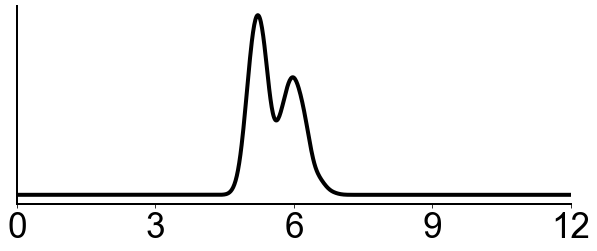

In [ ]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
#xtckL = ["-90","-45","0","45","90"]
ytck = [0,3,6,9,12]
ytckL = ["0","3","6","9","12"]
x_eval = np.linspace(0, 13, num=1000)
deg45 = int(np.round(l/2))
x = np.arange(2,l-2,4)
xL = [str(round(i)) for i in x*360/l-180]
_, ax = plt.subplots(1, 1, figsize=(figS*1.4, figS*.6))
kde = gaussian_kde(spd_post[:,deg45,x[3],2,2,1])
print("Speed: 7cps")
print("direction: center=0, surround=", xL[3])
Y = kde(x_eval)
X = x_eval.copy()
ax.plot(X,Y,  'k-', linewidth=line_w+2)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(ytck)
#ax.yaxis.set_ticks([0,0.5, 1])
ax.xaxis.set_ticklabels(ytckL)
ax.set_xlim(0, 12)
#ax.set_ylim(-0.03, 1)
ax.yaxis.set_ticks([])
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
plt.tight_layout()
plt.savefig(sp+"onePostSpd_subj2_rel.pdf")
plt.show()

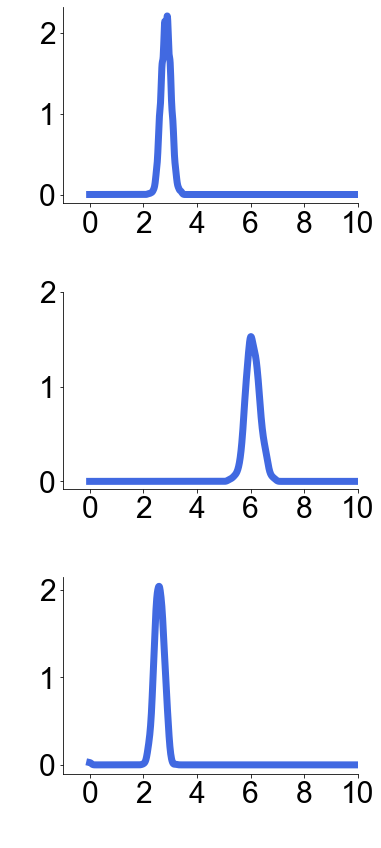

In [ ]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
xtckL = ["-90","-45","0","45","90"]
ytck = [-90,-45,0,45,90]
ytckL = ["-90","-45","0","45","90"]
x_eval = np.linspace(-180, 180, num=1000)
deg45 = int(np.round(l/2))
x = range(deg45)
#xL = [-180,-135,-130,-90,-45,-10,0,10,45,90,130,135,180]
x = [[57,45], [45,90], [78,68]]
ytck = [0,2,4,6,8,10]
ytckL = ["0","5","10","15","20"]
x_eval = np.linspace(0, 10, num=1000)
#ylab = "Center relative direction (deg.)"
ylab = " "
s=1
_, ax = plt.subplots(len(x), 1, figsize=(figS*0.9, figS*len(x)*0.66))
for ti, t in enumerate(x):
    y = spd_post[:,t[0],t[1],2,2,s]
    y = np.round(y,1)
    if len(np.unique(y))<10:
        print("no variability",np.unique(y))
        Y = [0,2]
        m = int(np.round(np.mean(y)))
        X = [m,m]
    else:
        kde = gaussian_kde(y)
        Y = kde(x_eval)
        X = x_eval.copy()
    axins = ax[ti]
    axins.plot(X, Y, "-", color="royalblue", linewidth=line_w+5)
    #axins.set_xlim([0,1])
    axins.set_xlim([-1, 10])
    #stimType = 'Surround direction = '+str(xL[ti])
    #axins.annotate(stimType, xy=(0.1,0.9),xycoords='axes fraction',fontsize=f_font1["size"])
    axins.spines["right"].set_visible(False)
    axins.spines["top"].set_visible(False)
    #axins.spines["bottom"].set_visible(False)
    axins.grid(False)
    #axins.spines["bottom"].set_visible(False)

    #axins.tick_params(right=False,bottom=False,top=False,labeltop=False,labelbottom=False)
    axins.set_xlabel(ylab, **f_font1)
    axins.xaxis.set_ticks(ytck)
    axins.xaxis.set_ticklabels(ytck, **f_font1)

    
    axins.yaxis.set_ticks([0,1,2])
    axins.set_ylabel(" ", **f_font1)
    #axins.yaxis.set_ticklabels([])
    for labl in (axins.get_xticklabels()+axins.get_yticklabels()):
            labl.set_fontname(f_font1["fontname"])
            labl.set_fontsize(f_font1["size"])
plt.tight_layout()
plt.savefig(sp+"postSpd0_samespeed_example_metam1_rel"+str(s)+".pdf")
plt.show()

2.8928928928928928
6.016016016016016
2.5825825825825826


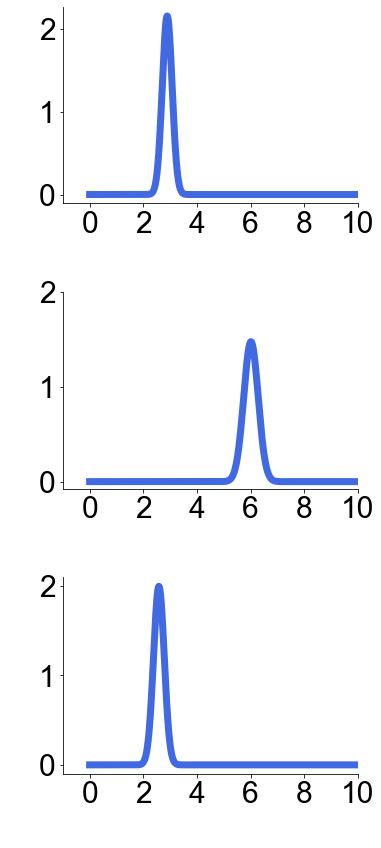

In [ ]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
xtckL = ["-90","-45","0","45","90"]
ytck = [-90,-45,0,45,90]
ytckL = ["-90","-45","0","45","90"]
x_eval = np.linspace(-180, 180, num=1000)
deg45 = int(np.round(l/2))
x = range(deg45)
#xL = [-180,-135,-130,-90,-45,-10,0,10,45,90,130,135,180]
x = [[57,45], [45,90], [78,68]]
ytck = [0,2,4,6,8,10]
ytckL = ["0","5","10","15","20"]
x_eval = np.linspace(0, 10, num=1000)
#ylab = "Center relative direction (deg.)"
ylab = " "
s=1
_, ax = plt.subplots(len(x), 1, figsize=(figS*0.9, figS*len(x)*0.66))
for ti, t in enumerate(x):
    y = spd_post[:,t[0],t[1],2,2,s]
    y = np.round(y,1)
    if len(np.unique(y))<10:
        print("no variability",np.unique(y))
        Y = [0,2]
        m = int(np.round(np.mean(y)))
        X = [m,m]
    else:
        kde = gaussian_kde(y)
        Y = kde(x_eval)
        X = x_eval.copy()
    axins = ax[ti]
    if ti==0:
        yy = norm.pdf(x_eval, loc=X[np.argmax(Y)], scale=.185)
    elif ti==1:
        yy = norm.pdf(x_eval, loc=X[np.argmax(Y)], scale=.27)
    elif ti==2:
        yy = norm.pdf(x_eval, loc=X[np.argmax(Y)], scale=.2)
    print(X[np.argmax(Y)])
    #axins.plot(X, Y, "-", color="red", linewidth=line_w+5)
    axins.plot(X, yy, "-", color="royalblue", linewidth=line_w+5)
    #axins.set_xlim([0,1])
    axins.set_xlim([-1, 10])
    #stimType = 'Surround direction = '+str(xL[ti])
    #axins.annotate(stimType, xy=(0.1,0.9),xycoords='axes fraction',fontsize=f_font1["size"])
    axins.spines["right"].set_visible(False)
    axins.spines["top"].set_visible(False)
    #axins.spines["bottom"].set_visible(False)
    axins.grid(False)
    #axins.spines["bottom"].set_visible(False)

    #axins.tick_params(right=False,bottom=False,top=False,labeltop=False,labelbottom=False)
    axins.set_xlabel(ylab, **f_font1)
    axins.xaxis.set_ticks(ytck)
    axins.xaxis.set_ticklabels(ytck, **f_font1)

    
    axins.yaxis.set_ticks([0,1,2])
    axins.set_ylabel(" ", **f_font1)
    #axins.yaxis.set_ticklabels([])
    for labl in (axins.get_xticklabels()+axins.get_yticklabels()):
            labl.set_fontname(f_font1["fontname"])
            labl.set_fontsize(f_font1["size"])
plt.tight_layout()
plt.savefig(sp+"postSpd0_samespeed_example_metam2_rel"+str(s)+".pdf")
plt.show()

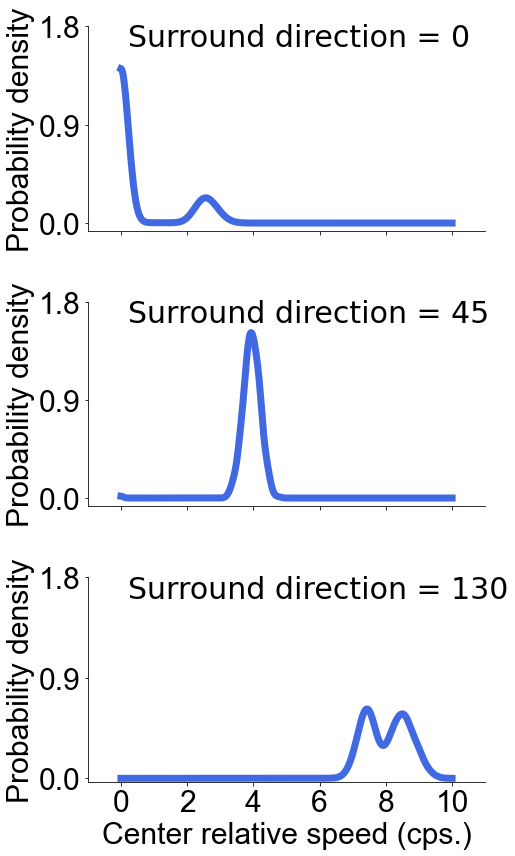

In [ ]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
#xtckL = ["-90","-45","0","45","90"]
ytck = [-90,-45,0,45,90]
ytck = [0,2,4,6,8,10]
ytckL = ["0","5","10","15","20"]
x_eval = np.linspace(0, 10, num=1000)
#x_eval = np.linspace(-180, 180, num=1000)
deg45 = int(np.round(l/2))
x = [2, 11, 13, 23, 34, 43, 45, 48, 57, 68, 78, 80]
xL = [-180,-135,-130,-90,-45,-10,0,10,45,90,130,135]
x = [45, 57, 78,]
xL = [0,45,130,]

#ylab = "Center relative direction (deg.)"
ylab = "Center relative speed (cps.)"
s=1
_, ax = plt.subplots(len(x), 1, figsize=(figS*1.2, figS*len(x)*0.66))
for ti, t in enumerate(x):
    y1 = spd_post[:,deg45,t,3,3,s]
    y2 = spd_post[:,deg45-1,t,3,3,s]
    y = np.hstack((y1,y2))
    y = np.round(y,1)
    if len(np.unique(y))<10:
        print("no variability",np.unique(y))
        Y = [0,2]
        m = int(np.round(np.mean(y)))
        X = [m,m]
    else:
        # if (t==45) or (t==46):
        #      Y = np.repeat(1/len(x_eval), len(x_eval))
        # elif (t==43):
        #      Y = 0.5*np.repeat(1/len(x_eval), len(x_eval)) + 0.5*norm.pdf(x_eval, loc=-31, scale=10)
        # elif (t==48):
        #      Y = 0.5*np.repeat(1/len(x_eval), len(x_eval)) + 0.5*norm.pdf(x_eval, loc=31, scale=10)
        # else:
        kde = gaussian_kde(y)
        Y = kde(x_eval)
        X = x_eval.copy()
    axins = ax[ti]
    axins.plot(X, Y, "-", color="royalblue", linewidth=line_w+5)
    #axins.set_xlim([0,1])
    axins.set_xlim([-1, 11])
    stimType = 'Surround direction = '+str(xL[ti])
    axins.annotate(stimType, xy=(0.1,0.9),xycoords='axes fraction',fontsize=f_font1["size"])
    axins.spines["right"].set_visible(False)
    axins.spines["top"].set_visible(False)
    #axins.spines["bottom"].set_visible(False)
    axins.grid(False)
    if ti==len(x)-1:
        #axins.tick_params(right=False,bottom=False,top=False,labeltop=False,labelbottom=False)
        axins.set_xlabel(ylab, **f_font1)
        axins.xaxis.set_ticks(ytck)
        axins.xaxis.set_ticklabels(ytck, **f_font1)
        #xxr,xxrL = [0,0.01], ["0","0.01"]
    else:
        #axins.tick_params(left=False,right=False,bottom=False,top=False,labeltop=False,labelbottom=False)
        axins.xaxis.set_ticks(ytck)
        axins.xaxis.set_ticklabels([" " for i in range(len(ytck))], **f_font1)
        axins.set_xlabel(" ")
        #xxr,xxrL = [0, np.round(np.max(Y[t, :, r])*0.66,2)], ["0", str(np.round(np.max(Y[t, :, r])*0.66,2))]
    axins.yaxis.set_ticks([0,0.9,1.8])
    axins.set_ylabel("Probability density", **f_font1)
    #axins.yaxis.set_ticklabels([])
    for labl in (axins.get_xticklabels()+axins.get_yticklabels()):
            labl.set_fontname(f_font1["fontname"])
            labl.set_fontsize(f_font1["size"])
plt.tight_layout()
plt.savefig(sp+"postSpd0_samespeed_3example_surround_rel"+str(s)+".pdf")
plt.show()

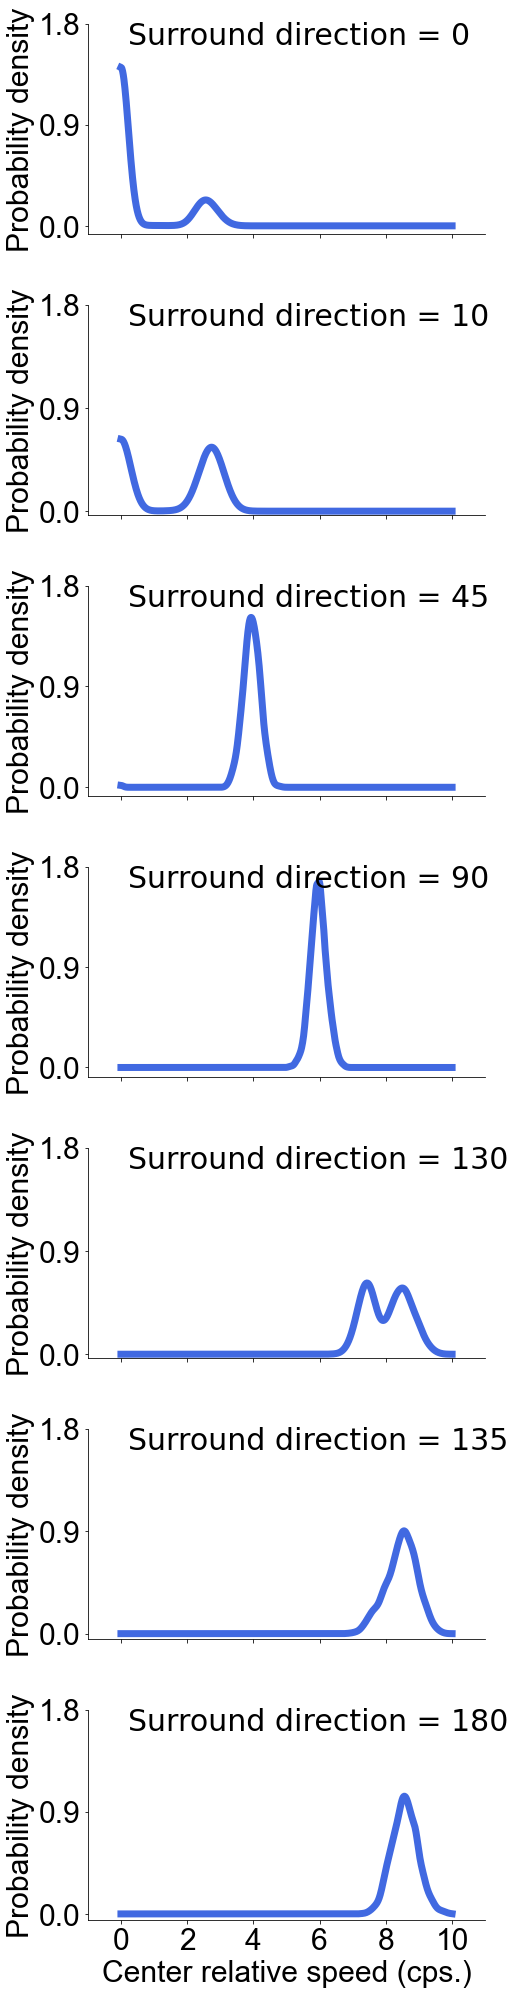

In [ ]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
#xtckL = ["-90","-45","0","45","90"]
ytck = [-90,-45,0,45,90]
ytck = [0,2,4,6,8,10]
ytckL = ["0","5","10","15","20"]
x_eval = np.linspace(0, 10, num=1000)
#x_eval = np.linspace(-180, 180, num=1000)
deg45 = int(np.round(l/2))
x = [2, 11, 13, 23, 34, 43, 45, 48, 57, 68, 78, 80]
xL = [-180,-135,-130,-90,-45,-10,0,10,45,90,130,135]
x = [45, 48, 57, 68, 78, 80,88]
xL = [0,10,45,90,130,135,180]

#ylab = "Center relative direction (deg.)"
ylab = "Center relative speed (cps.)"
s=1
_, ax = plt.subplots(len(x), 1, figsize=(figS*1.2, figS*len(x)*0.66))
for ti, t in enumerate(x):
    y1 = spd_post[:,deg45,t,3,3,s]
    y2 = spd_post[:,deg45-1,t,3,3,s]
    y = np.hstack((y1,y2))
    y = np.round(y,1)
    if len(np.unique(y))<10:
        print("no variability",np.unique(y))
        Y = [0,2]
        m = int(np.round(np.mean(y)))
        X = [m,m]
    else:
        # if (t==45) or (t==46):
        #      Y = np.repeat(1/len(x_eval), len(x_eval))
        # elif (t==43):
        #      Y = 0.5*np.repeat(1/len(x_eval), len(x_eval)) + 0.5*norm.pdf(x_eval, loc=-31, scale=10)
        # elif (t==48):
        #      Y = 0.5*np.repeat(1/len(x_eval), len(x_eval)) + 0.5*norm.pdf(x_eval, loc=31, scale=10)
        # else:
        kde = gaussian_kde(y)
        Y = kde(x_eval)
        X = x_eval.copy()
    axins = ax[ti]
    axins.plot(X, Y, "-", color="royalblue", linewidth=line_w+5)
    #axins.set_xlim([0,1])
    axins.set_xlim([-1, 11])
    stimType = 'Surround direction = '+str(xL[ti])
    axins.annotate(stimType, xy=(0.1,0.9),xycoords='axes fraction',fontsize=f_font1["size"])
    axins.spines["right"].set_visible(False)
    axins.spines["top"].set_visible(False)
    #axins.spines["bottom"].set_visible(False)
    axins.grid(False)
    if ti==len(x)-1:
        #axins.tick_params(right=False,bottom=False,top=False,labeltop=False,labelbottom=False)
        axins.set_xlabel(ylab, **f_font1)
        axins.xaxis.set_ticks(ytck)
        axins.xaxis.set_ticklabels(ytck, **f_font1)
        #xxr,xxrL = [0,0.01], ["0","0.01"]
    else:
        #axins.tick_params(left=False,right=False,bottom=False,top=False,labeltop=False,labelbottom=False)
        axins.xaxis.set_ticks(ytck)
        axins.xaxis.set_ticklabels([" " for i in range(len(ytck))], **f_font1)
        axins.set_xlabel(" ")
        #xxr,xxrL = [0, np.round(np.max(Y[t, :, r])*0.66,2)], ["0", str(np.round(np.max(Y[t, :, r])*0.66,2))]
    axins.yaxis.set_ticks([0,0.9,1.8])
    axins.set_ylabel("Probability density", **f_font1)
    #axins.yaxis.set_ticklabels([])
    for labl in (axins.get_xticklabels()+axins.get_yticklabels()):
            labl.set_fontname(f_font1["fontname"])
            labl.set_fontsize(f_font1["size"])
plt.tight_layout()
plt.savefig(sp+"postSpd0_samespeed_example_surround_rel"+str(s)+".pdf")
plt.show()

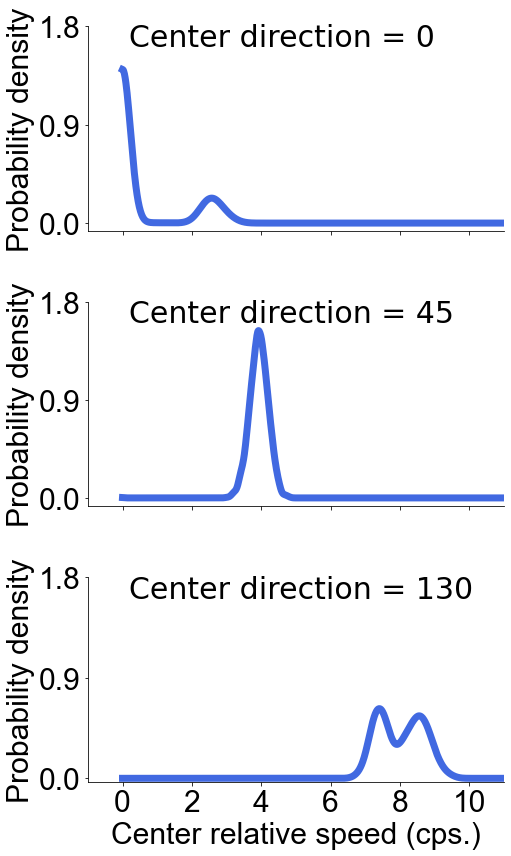

In [ ]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
#xtckL = ["-90","-45","0","45","90"]
ytck = [-90,-45,0,45,90]
ytck = [0,2,4,6,8,10]
ytckL = ["0","5","10","15","20"]
x_eval = np.linspace(0, 11, num=1000)
#x_eval = np.linspace(-180, 180, num=1000)
deg45 = int(np.round(l/2))
x = [2, 11, 13, 23, 34, 43, 45, 48, 57, 68, 78, 80]
xL = [-180,-135,-130,-90,-45,-10,0,10,45,90,130,135]
x = [45, 57, 78]
xL = [0,45,130]
#ylab = "Center relative direction (deg.)"
ylab = "Center relative speed (cps.)"
s=1
_, ax = plt.subplots(len(x), 1, figsize=(figS*1.2, figS*len(x)*0.66))
for ti, t in enumerate(x):
    y1 = spd_post[:,t,deg45,3,3,s]
    y2 = spd_post[:,t,deg45-1,3,3,s]
    y = np.hstack((y1,y2))
    y = np.round(y,1)
    if len(np.unique(y))<10:
        print("no variability",np.unique(y))
        Y = [0,2]
        m = int(np.round(np.mean(y)))
        X = [m,m]
    else:
        # if (t==45) or (t==46):
        #      Y = np.repeat(1/len(x_eval), len(x_eval))
        # elif (t==43):
        #      Y = 0.5*np.repeat(1/len(x_eval), len(x_eval)) + 0.5*norm.pdf(x_eval, loc=-31, scale=10)
        # elif (t==48):
        #      Y = 0.5*np.repeat(1/len(x_eval), len(x_eval)) + 0.5*norm.pdf(x_eval, loc=31, scale=10)
        # else:
        kde = gaussian_kde(y)
        Y = kde(x_eval)
        X = x_eval.copy()
    axins = ax[ti]
    axins.plot(X, Y, "-", color="royalblue", linewidth=line_w+5)
    #axins.set_xlim([0,1])
    axins.set_xlim([-1, 11])
    stimType = 'Center direction = '+str(xL[ti])
    axins.annotate(stimType, xy=(0.1,0.9),xycoords='axes fraction',fontsize=f_font1["size"])
    axins.spines["right"].set_visible(False)
    axins.spines["top"].set_visible(False)
    #axins.spines["bottom"].set_visible(False)
    axins.grid(False)
    if ti==len(x)-1:
        #axins.tick_params(right=False,bottom=False,top=False,labeltop=False,labelbottom=False)
        axins.set_xlabel(ylab, **f_font1)
        axins.xaxis.set_ticks(ytck)
        axins.xaxis.set_ticklabels(ytck, **f_font1)
        #xxr,xxrL = [0,0.01], ["0","0.01"]
    else:
        #axins.tick_params(left=False,right=False,bottom=False,top=False,labeltop=False,labelbottom=False)
        axins.xaxis.set_ticks(ytck)
        axins.xaxis.set_ticklabels([" " for i in range(len(ytck))], **f_font1)
        axins.set_xlabel(" ")
        #xxr,xxrL = [0, np.round(np.max(Y[t, :, r])*0.66,2)], ["0", str(np.round(np.max(Y[t, :, r])*0.66,2))]
    axins.yaxis.set_ticks([0,0.9,1.8])
    axins.set_ylabel("Probability density", **f_font1)
    #axins.yaxis.set_ticklabels([])
    for labl in (axins.get_xticklabels()+axins.get_yticklabels()):
            labl.set_fontname(f_font1["fontname"])
            labl.set_fontsize(f_font1["size"])
plt.tight_layout()
plt.savefig(sp+"postSpd0_samespeed_3example_center_rel"+str(s)+".pdf")
plt.show()

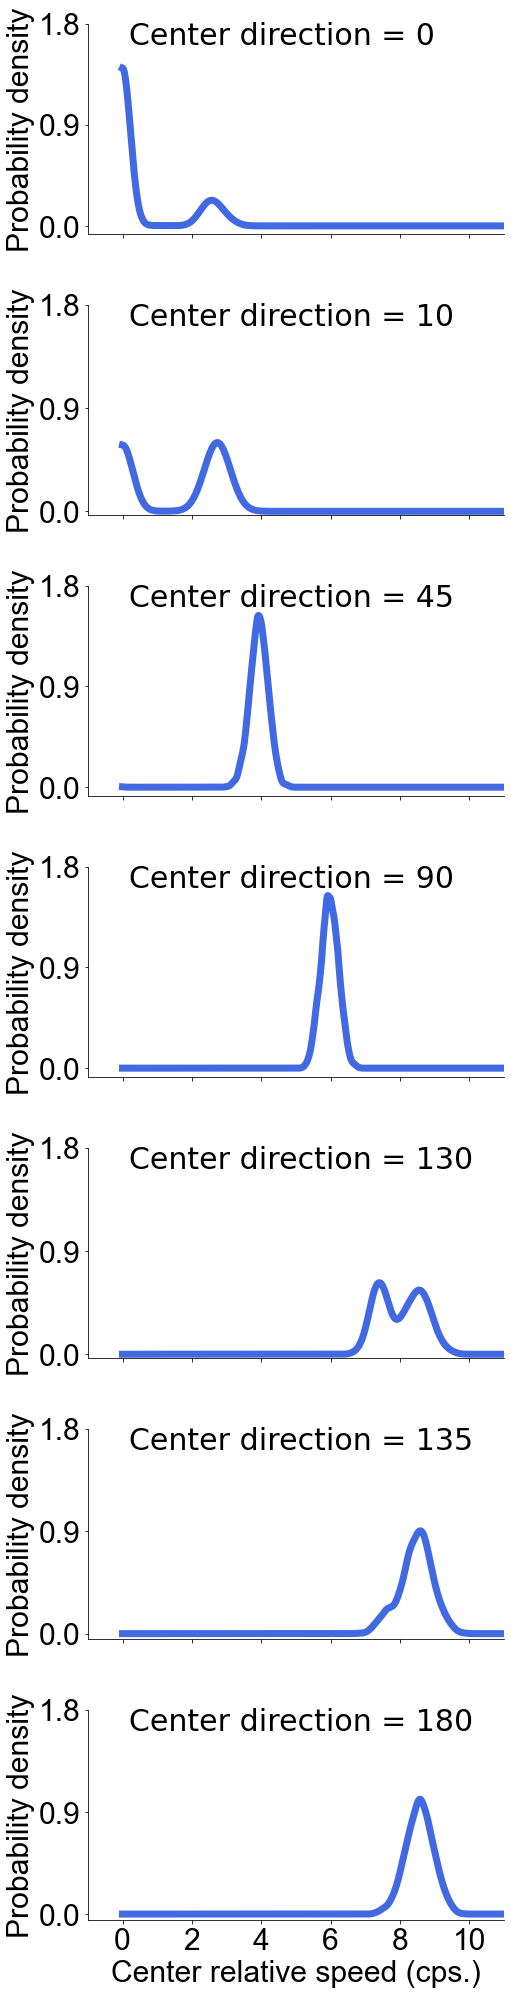

In [ ]:
l = dir_post.shape[1]
xtck = [0,int(np.round(l/4)),int(np.round(l/2)),int(np.round(l*3/4)),int(np.round(l))]
#xtckL = ["-90","-45","0","45","90"]
ytck = [-90,-45,0,45,90]
ytck = [0,2,4,6,8,10]
ytckL = ["0","5","10","15","20"]
x_eval = np.linspace(0, 11, num=1000)
#x_eval = np.linspace(-180, 180, num=1000)
deg45 = int(np.round(l/2))
x = [2, 11, 13, 23, 34, 43, 45, 48, 57, 68, 78, 80]
xL = [-180,-135,-130,-90,-45,-10,0,10,45,90,130,135]
x = [45, 48, 57, 68, 78, 80,88]
xL = [0,10,45,90,130,135,180]
#ylab = "Center relative direction (deg.)"
ylab = "Center relative speed (cps.)"
s=1
_, ax = plt.subplots(len(x), 1, figsize=(figS*1.2, figS*len(x)*0.66))
for ti, t in enumerate(x):
    y1 = spd_post[:,t,deg45,3,3,s]
    y2 = spd_post[:,t,deg45-1,3,3,s]
    y = np.hstack((y1,y2))
    y = np.round(y,1)
    if len(np.unique(y))<10:
        print("no variability",np.unique(y))
        Y = [0,2]
        m = int(np.round(np.mean(y)))
        X = [m,m]
    else:
        # if (t==45) or (t==46):
        #      Y = np.repeat(1/len(x_eval), len(x_eval))
        # elif (t==43):
        #      Y = 0.5*np.repeat(1/len(x_eval), len(x_eval)) + 0.5*norm.pdf(x_eval, loc=-31, scale=10)
        # elif (t==48):
        #      Y = 0.5*np.repeat(1/len(x_eval), len(x_eval)) + 0.5*norm.pdf(x_eval, loc=31, scale=10)
        # else:
        kde = gaussian_kde(y)
        Y = kde(x_eval)
        X = x_eval.copy()
    axins = ax[ti]
    axins.plot(X, Y, "-", color="royalblue", linewidth=line_w+5)
    #axins.set_xlim([0,1])
    axins.set_xlim([-1, 11])
    stimType = 'Center direction = '+str(xL[ti])
    axins.annotate(stimType, xy=(0.1,0.9),xycoords='axes fraction',fontsize=f_font1["size"])
    axins.spines["right"].set_visible(False)
    axins.spines["top"].set_visible(False)
    #axins.spines["bottom"].set_visible(False)
    axins.grid(False)
    if ti==len(x)-1:
        #axins.tick_params(right=False,bottom=False,top=False,labeltop=False,labelbottom=False)
        axins.set_xlabel(ylab, **f_font1)
        axins.xaxis.set_ticks(ytck)
        axins.xaxis.set_ticklabels(ytck, **f_font1)
        #xxr,xxrL = [0,0.01], ["0","0.01"]
    else:
        #axins.tick_params(left=False,right=False,bottom=False,top=False,labeltop=False,labelbottom=False)
        axins.xaxis.set_ticks(ytck)
        axins.xaxis.set_ticklabels([" " for i in range(len(ytck))], **f_font1)
        axins.set_xlabel(" ")
        #xxr,xxrL = [0, np.round(np.max(Y[t, :, r])*0.66,2)], ["0", str(np.round(np.max(Y[t, :, r])*0.66,2))]
    axins.yaxis.set_ticks([0,0.9,1.8])
    axins.set_ylabel("Probability density", **f_font1)
    #axins.yaxis.set_ticklabels([])
    for labl in (axins.get_xticklabels()+axins.get_yticklabels()):
            labl.set_fontname(f_font1["fontname"])
            labl.set_fontsize(f_font1["size"])
plt.tight_layout()
plt.savefig(sp+"postSpd0_samespeed_example_center_rel"+str(s)+".pdf")
plt.show()

159.09909909909908 0.014605305925411264


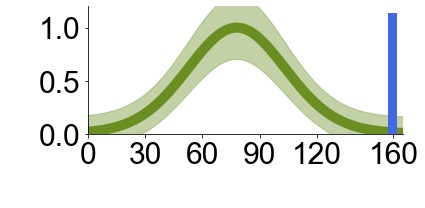

2.4504504504504503 0.6659689207434096


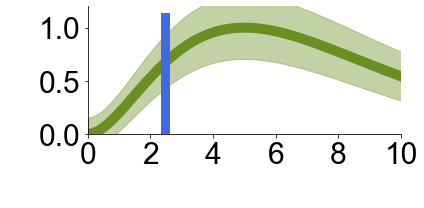

In [ ]:
kappa=5
mu=78
xd = np.linspace(-180, 180, num=1000)
r_dir =  np.exp(kappa * (np.cos( ((xd-mu)/180)*np.pi )-1))

kappa=0.4
mu=0
n=2
xs = np.linspace(0, 18, num=1000)
r_spd = ((kappa*(xs - mu))**n * np.exp(-kappa*(xs - mu)))/(n**n * np.exp(-n))
c = ["royalblue", "olivedrab", "darkorange", "firebrick"]
error = 0.15
for i,Y in enumerate([r_dir, r_spd]):
    _, ax = plt.subplots(1, 1, figsize=(figS*1, figS*0.5))
    axins = ax
   
    if i==0:
        X = xd
        #axins.tick_params(right=False,bottom=False,top=False,labeltop=False,labelbottom=False)
        axins.set_xlabel(" ", **f_font1)
        axins.xaxis.set_ticks([0,30,60,90,120,160])
        axins.xaxis.set_ticklabels([0,30,60,90,120,160], **f_font1)
        v1,v2 = 77.9,78.1
        v1,v2 = -.9,1.1
        v1,v2 = 158.9,160.1
        axins.set_xlim([0, 165])
        #xxr,xxrL = [0,0.01], ["0","0.01"]
    else:
        X=xs
        #axins.tick_params(left=False,right=False,bottom=False,top=False,labeltop=False,labelbottom=False)
        axins.set_xlabel(" ", **f_font1)
        axins.xaxis.set_ticks([0,2,4,6,8,10])
        axins.xaxis.set_ticklabels([0,2,4,6,8,10], **f_font1)
        #xxr,xxrL = [0, np.round(np.max(Y[t, :, r])*0.66,2)], ["0", str(np.round(np.max(Y[t, :, r])*0.66,2))]
        v1,v2 = 2.99,3.01
        v1,v2 = 5.99,6.01
        v1,v2 = 2.45,2.55
        axins.set_xlim([0, 10])
    axins.set_ylim([0,1.2])
    axins.yaxis.set_ticks([0,0.5,1])
    axins.fill_between(X, Y-(error+error*Y), Y+(error+error*Y), color=c[1], alpha=0.4)
    axins.plot(X, Y, "-", color=c[1], linewidth=line_w+8)
    ix = np.where((X<v2) & (X>v1))[0][0]
    axins.plot([X[ix],X[ix]], [0,1.1], "-", color=c[0], linewidth=line_w+7)
    print(X[ix],Y[ix])
    axins.spines["right"].set_visible(False)
    axins.spines["top"].set_visible(False)
    #axins.spines["bottom"].set_visible(False)
    axins.grid(False)
    axins.set_ylabel(" ", **f_font1)
    #axins.yaxis.set_ticklabels([])
    for labl in (axins.get_xticklabels()+axins.get_yticklabels()):
            labl.set_fontname(f_font1["fontname"])
            labl.set_fontsize(f_font1["size"])
    plt.tight_layout()
    plt.savefig(sp+"TunC_example3_"+str(i)+".pdf")
    plt.show()


In [ ]:
Y[ix]

0.7992650300262982

In [ ]:
(error+error*Y[ix])

0.2698897545039447

In [ ]:
d[0][1]*d[1][1]

0.017562588896794244

In [ ]:
d

[[78.01801801801798, 0.9999997527657009, 0.2999999629148551],
 [2.990990990990991, 0.7992650300262982, 0.2698897545039447]]

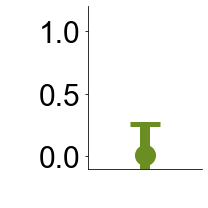

In [ ]:
d=[]
for i,Y in enumerate([r_dir, r_spd]):
        
        if i==0:
                X = xd
                
                v1,v2 = 77.9,78.1
                v1,v2 = -.9,1.1
                v1,v2 = 158.9,160.1

        else:
                X=xs

                v1,v2 = 2.99,3.01
                v1,v2 = 5.99,6.01
                v1,v2 = 2.45,2.55
        ix = np.where((X<v2) & (X>v1))[0][0]
        d.append([X[ix], Y[ix], (error+error*Y[ix])])
y = d[0][1]*d[1][1]
_, ax = plt.subplots(1, 1, figsize=(figS*0.5, figS*0.5))
axins = ax
axins.set_xlabel(" ", **f_font1)
axins.xaxis.set_ticks([ ])
axins.set_ylim([-0.1,1.2])
axins.yaxis.set_ticks([0,0.5,1])

axins.errorbar(1,y, yerr=np.array([[d[1][2]],[d[1][2]]]), fmt='-o', color=c[1], capsize=15, capthick=5, markersize=20, linewidth=line_w+8)
axins.spines["right"].set_visible(False)
axins.spines["top"].set_visible(False)
#axins.spines["bottom"].set_visible(False)
axins.grid(False)
axins.set_ylabel(" ", **f_font1)
#axins.yaxis.set_ticklabels([])
for labl in (axins.get_xticklabels()+axins.get_yticklabels()):
        labl.set_fontname(f_font1["fontname"])
        labl.set_fontsize(f_font1["size"])
plt.tight_layout()
#plt.savefig(sp+"fire_example4_"+str(i)+".pdf")
plt.show()


In [ ]:
d

[[159.09909909909908, 0.014605305925411264, 0.15219079588881168],
 [2.4504504504504503, 0.6659689207434096, 0.24989533811151143]]

In [ ]:
[[78.01801801801798, 0.9999997527657009, 0.2999999629148551],
 [2.990990990990991, 0.7992650300262982, 0.2698897545039447]]

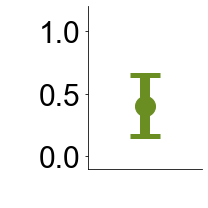

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(figS*0.5, figS*0.5))
axins = ax
axins.set_xlabel(" ", **f_font1)
axins.xaxis.set_ticks([ ])
axins.set_ylim([-0.1,1.2])
axins.yaxis.set_ticks([0,0.5,1])
y = 0.5*(0.9999997527657009*0.7992650300262982)+0.5*(0.014605305925411264*0.6659689207434096)
ye = (0.5*(0.15219079588881168+0.24989533811151143)+0.5*(0.2999999629148551+0.2698897545039447))/2
axins.errorbar(1,y, yerr=np.array([[ye],[ye]]), fmt='-o', color=c[1], capsize=15, capthick=5, markersize=20, linewidth=line_w+8)
axins.spines["right"].set_visible(False)
axins.spines["top"].set_visible(False)
#axins.spines["bottom"].set_visible(False)
axins.grid(False)
axins.set_ylabel(" ", **f_font1)
#axins.yaxis.set_ticklabels([])
for labl in (axins.get_xticklabels()+axins.get_yticklabels()):
        labl.set_fontname(f_font1["fontname"])
        labl.set_fontsize(f_font1["size"])
plt.tight_layout()
plt.savefig(sp+"fire_example34_"+str(i)+".pdf")
plt.show()


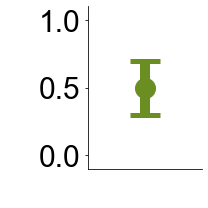

In [ ]:
c = ["royalblue", "olivedrab", "darkorange", "firebrick"]
_, ax = plt.subplots(1, 1, figsize=(figS*0.5, figS*0.5))
axins = ax
axins.set_xlabel(" ", **f_font1)
axins.xaxis.set_ticks([ ])
axins.set_ylim([-0.1,1.2])
axins.yaxis.set_ticks([0,0.5,1])
y = 0.5
ye = 0.2
axins.errorbar(1,y, yerr=np.array([[ye],[ye]]), fmt='-o', color=c[1], capsize=15, capthick=5, markersize=20, linewidth=line_w+8)
axins.spines["right"].set_visible(False)
axins.spines["top"].set_visible(False)
#axins.spines["bottom"].set_visible(False)
axins.set_ylim([-0.1,1.1])
axins.grid(False)
axins.set_ylabel(" ", **f_font1)
#axins.yaxis.set_ticklabels([])
for labl in (axins.get_xticklabels()+axins.get_yticklabels()):
        labl.set_fontname(f_font1["fontname"])
        labl.set_fontsize(f_font1["size"])
plt.tight_layout()
plt.savefig(sp+"fire_example222.pdf")
plt.show()

78.01801801801798 0.9999997527657009


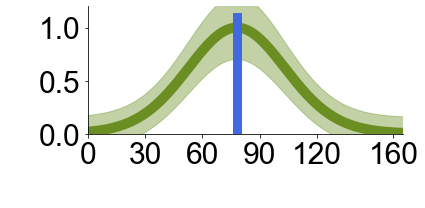

2.990990990990991 0.7992650300262982


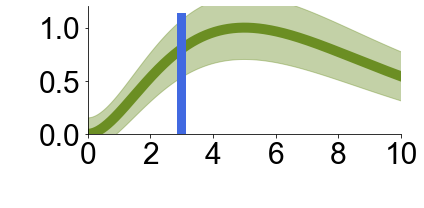

In [14]:
kappa=5
mu=78
xd = np.linspace(-180, 180, num=1000)
r_dir =  np.exp(kappa * (np.cos( ((xd-mu)/180)*np.pi )-1))

kappa=0.4
mu=0
n=2
xs = np.linspace(0, 18, num=1000)
r_spd = ((kappa*(xs - mu))**n * np.exp(-kappa*(xs - mu)))/(n**n * np.exp(-n))
c = ["royalblue", "olivedrab", "darkorange", "firebrick"]
error = 0.15
for i,Y in enumerate([r_dir, r_spd]):
    _, ax = plt.subplots(1, 1, figsize=(figS*1, figS*0.5))
    axins = ax
   
    if i==0:
        X = xd
        #axins.tick_params(right=False,bottom=False,top=False,labeltop=False,labelbottom=False)
        axins.set_xlabel(" ", **f_font1)
        axins.xaxis.set_ticks([0,30,60,90,120,160])
        axins.xaxis.set_ticklabels([0,30,60,90,120,160], **f_font1)
        v1,v2 = 77.9,78.1
        axins.set_xlim([0, 165])
        #xxr,xxrL = [0,0.01], ["0","0.01"]
    else:
        X=xs
        #axins.tick_params(left=False,right=False,bottom=False,top=False,labeltop=False,labelbottom=False)
        axins.set_xlabel(" ", **f_font1)
        axins.xaxis.set_ticks([0,2,4,6,8,10])
        axins.xaxis.set_ticklabels([0,2,4,6,8,10], **f_font1)
        #xxr,xxrL = [0, np.round(np.max(Y[t, :, r])*0.66,2)], ["0", str(np.round(np.max(Y[t, :, r])*0.66,2))]
        v1,v2 = 2.99,3.01

        axins.set_xlim([0, 10])
    axins.set_ylim([0,1.2])
    axins.yaxis.set_ticks([0,0.5,1])
    axins.fill_between(X, Y-(error+error*Y), Y+(error+error*Y), color=c[1], alpha=0.4)
    axins.plot(X, Y, "-", color=c[1], linewidth=line_w+8)
    ix = np.where((X<v2) & (X>v1))[0][0]
    axins.plot([X[ix],X[ix]], [0,1.1], "-", color=c[0], linewidth=line_w+7)
    print(X[ix],Y[ix])
    axins.spines["right"].set_visible(False)
    axins.spines["top"].set_visible(False)
    #axins.spines["bottom"].set_visible(False)
    axins.grid(False)
    axins.set_ylabel(" ", **f_font1)
    #axins.yaxis.set_ticklabels([])
    for labl in (axins.get_xticklabels()+axins.get_yticklabels()):
            labl.set_fontname(f_font1["fontname"])
            labl.set_fontsize(f_font1["size"])
    plt.tight_layout()
    plt.savefig(sp+"TunC1_"+str(i)+".pdf")
    plt.show()

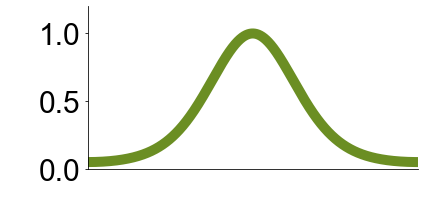

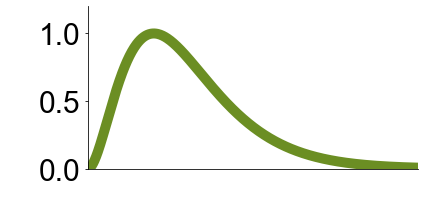

In [15]:
kappa=1.5
mu=0
xd = np.linspace(-180, 180, num=1000)
r_dir =  np.exp(kappa * (np.cos( ((xd-mu)/180)*np.pi )-1))

kappa=1
mu=0
n=2
xs = np.linspace(0, 18, num=1000)
r_spd = ((kappa*(xs - mu))**n * np.exp(-kappa*(xs - mu)))/(n**n * np.exp(-n))
c = ["royalblue", "olivedrab", "darkorange", "firebrick"]
error = 0.15
for i,Y in enumerate([r_dir, r_spd]):
    _, ax = plt.subplots(1, 1, figsize=(figS*1, figS*0.5))
    axins = ax
   
    if i==0:
        X = xd
        #axins.tick_params(right=False,bottom=False,top=False,labeltop=False,labelbottom=False)
        axins.set_xlabel(" ", **f_font1)
        axins.xaxis.set_ticks([ ])
        #axins.xaxis.set_ticklabels([0,30,60,90,120,160], **f_font1)
        v1,v2 = 77.9,78.1
        v1,v2 = -.9,1.1
        v1,v2 = 158.9,160.1
        axins.set_xlim([-180, 180])
        #xxr,xxrL = [0,0.01], ["0","0.01"]
    else:
        X=xs
        #axins.tick_params(left=False,right=False,bottom=False,top=False,labeltop=False,labelbottom=False)
        axins.set_xlabel(" ", **f_font1)
        axins.xaxis.set_ticks([ ])
        #axins.xaxis.set_ticklabels([0,2,4,6,8,10], **f_font1)
        #xxr,xxrL = [0, np.round(np.max(Y[t, :, r])*0.66,2)], ["0", str(np.round(np.max(Y[t, :, r])*0.66,2))]
        v1,v2 = 2.99,3.01
        v1,v2 = 5.99,6.01
        v1,v2 = 2.45,2.55
        axins.set_xlim([0, 10])
    axins.set_ylim([0,1.2])
    axins.yaxis.set_ticks([0,0.5,1])
    #axins.fill_between(X, Y-(error+error*Y), Y+(error+error*Y), color=c[1], alpha=0.4)
    axins.plot(X, Y, "-", color=c[1], linewidth=line_w+8)
    #ix = np.where((X<v2) & (X>v1))[0][0]
    #axins.plot([X[ix],X[ix]], [0,1.1], "-", color=c[0], linewidth=line_w+7)
    #print(X[ix],Y[ix])
    axins.spines["right"].set_visible(False)
    axins.spines["top"].set_visible(False)
    #axins.spines["bottom"].set_visible(False)
    axins.grid(False)
    axins.set_ylabel(" ", **f_font1)
    #axins.yaxis.set_ticklabels([])
    for labl in (axins.get_xticklabels()+axins.get_yticklabels()):
            labl.set_fontname(f_font1["fontname"])
            labl.set_fontsize(f_font1["size"])
    plt.tight_layout()
    plt.savefig(sp+"TunC_example33_"+str(i)+".pdf")
    plt.show()

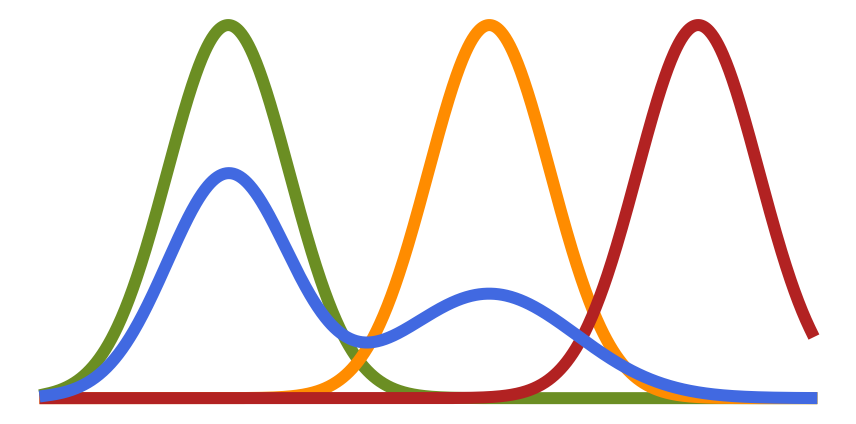

In [4]:
_, ax = plt.subplots(1, 1, figsize=(figS*2, figS))
c = ["royalblue", "olivedrab", "darkorange", "firebrick"]
x = np.linspace(-4.8,4,1000)
lw = 10
y = norm.pdf(x, loc=-2.7, scale=0.7)
ax.plot(x, y,  '-', linewidth=line_w+lw, color = c[1])
y = norm.pdf(x, loc=0.3, scale=0.7)
ax.plot(x, y,  '-', linewidth=line_w+lw, color = c[2])
y = norm.pdf(x, loc=2.7, scale=0.7)
ax.plot(x, y,  '-', linewidth=line_w+lw, color = c[3])
y = np.sum([0.6*norm.pdf(x, loc=-2.7, scale=0.7), 0.4*norm.pdf(x, loc=0.3, scale=1)], axis=0)
ax.plot(x, y,  '-', linewidth=line_w+lw, color = c[0])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
#ax.xaxis.set_ticks(range(1,len(M)+1))
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["#"+str(i+1) for i in range(len(M))])
#ax.set_xlim(0, 10)
#ax.set_ylim(-0.03, 0.4)
#ax.yaxis.set_ticks(yax)
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
plt.tight_layout()
plt.savefig(sp+"concept_mixture_1d.pdf")
plt.show()

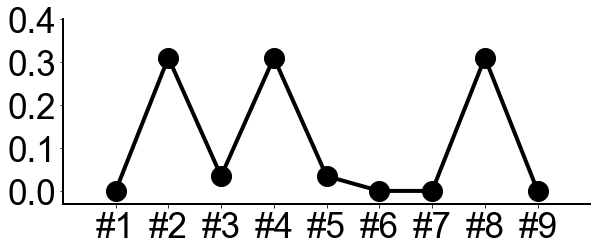

In [9]:
_, ax = plt.subplots(1, 1, figsize=(figS*1.4, figS*.6))
ax.plot(range(1,len(M)+1), W/np.sum(W),  'ko-', linewidth=line_w+2, markersize=20)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(range(1,len(M)+1))
ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
ax.xaxis.set_ticklabels(["#"+str(i+1) for i in range(len(M))])
ax.set_xlim(0, 10)
ax.set_ylim(-0.03, 0.4)
#ax.yaxis.set_ticks(yax)
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
plt.tight_layout()
plt.savefig(sp+"11concept_weights.pdf")
plt.show()

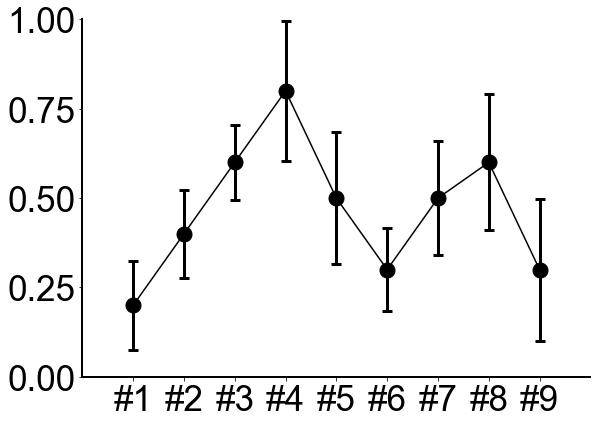

In [143]:
_, ax = plt.subplots(1, 1, figsize=(figS*1.4, figS))
err = 0.1 + 0.1*np.random.random(len(M))
r = np.array([0, 0.2, 0.4, 0.6, 0.3, 0.1, 0.3, 0.4, 0.1])+0.2
ax.errorbar(range(1,len(M)+1), r, yerr=err, color='k', fmt='o-', capsize=5, capthick=3, elinewidth=3, markersize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(range(1,len(M)+1))
ax.yaxis.set_ticks([0,0.25,0.5,0.75,1])
ax.xaxis.set_ticklabels(["#"+str(i+1) for i in range(len(M))])
ax.set_xlim(0, 10)
ax.set_ylim(0, 1)
#ax.yaxis.set_ticks(yax)
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
plt.tight_layout()
plt.savefig(sp+"concept_baseFire.pdf")
plt.show()

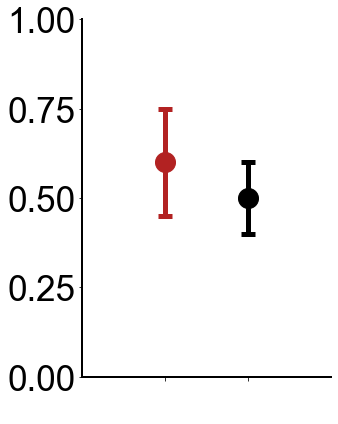

In [134]:
_, ax = plt.subplots(1, 1, figsize=(figS*0.8, figS))
err = [0.15, 0.1]
r = np.array([0.6, 0.5])
ax.errorbar(1, r[0], yerr=err[0], color="firebrick", fmt='o', capsize=7, capthick=5, elinewidth=5, markersize=20)
ax.errorbar(2, r[1], yerr=err[1], color='k', fmt='o', capsize=7, capthick=5, elinewidth=5, markersize=20)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(line_w)
ax.spines["bottom"].set_linewidth(line_w)
ax.spines["left"].set_linewidth(line_w)
ax.grid(False)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontname(f_font1["fontname"])
    label.set_fontsize(35)
ax.xaxis.set_ticks(range(1,len(r)+1))
ax.yaxis.set_ticks([0,0.25,0.5,0.75,1])
ax.xaxis.set_ticklabels([" " for i in range(len(r))])
ax.set_xlim(0, 3)
ax.set_ylim(0, 1)
#ax.yaxis.set_ticks(yax)
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
plt.tight_layout()
plt.savefig(sp+"concept_testFire.pdf")
plt.show()

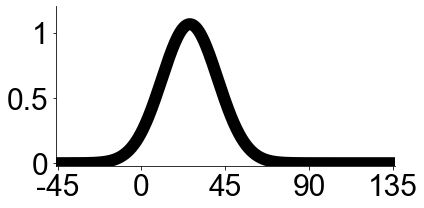

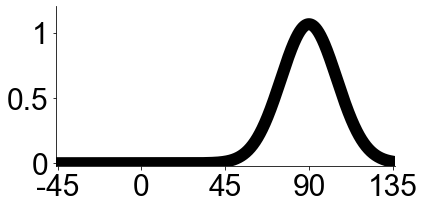

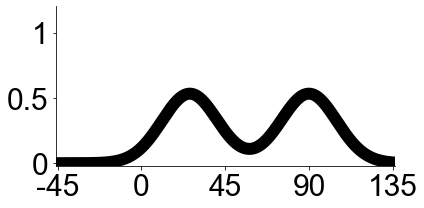

In [18]:
lw=10
x = np.linspace(-45,135,1000)
for mi,m in enumerate([26,90]):
    _, ax = plt.subplots(1, 1, figsize=(figS, figS*0.5))
    y = norm.pdf(x, loc=m, scale=15)
    ax.plot(x, y,  '-', linewidth=line_w+lw, color = "k")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    #ax.spines["bottom"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    ax.grid(False)
    # for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    #     label.set_fontname(f_font1["fontname"])
    #     label.set_fontsize(35)
    ax.xaxis.set_ticks([-45,0,45,90,135])
    #ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
    ax.xaxis.set_ticklabels([ "-45", "0", "45", "90","135"],**f_font1)
    ax.set_xlim(-46, 136)
    ax.set_ylim(-0.0005, 0.03)
    ax.yaxis.set_ticks([0,0.025/2,0.025])
    #ax.set_xlabel(" ")
    ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
    #plt.tick_params(top=False, bottom=False, left=False, right=False,
    #                labelleft=False, labelbottom=False)
    plt.tight_layout()
    plt.savefig(sp+"post_ill_pred"+str(mi)+".pdf")
    plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS, figS*0.5))
y1 = norm.pdf(x, loc=26, scale=15)
y2 = norm.pdf(x, loc=90, scale=15)
ax.plot(x, 0.5*y1+0.5*y2,  '-', linewidth=line_w+lw, color = "k")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([-45,0,45,90,135])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
ax.xaxis.set_ticklabels([ "-45", "0", "45", "90","135"],**f_font1)
ax.set_xlim(-46, 136)
ax.set_ylim(-0.0005, 0.03)
ax.yaxis.set_ticks([0,0.025/2,0.025])
#ax.set_xlabel(" ")
ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
plt.tight_layout()
plt.savefig(sp+"post_ill_mixpred"+str(mi)+".pdf")
plt.show()

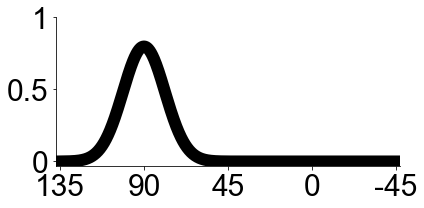

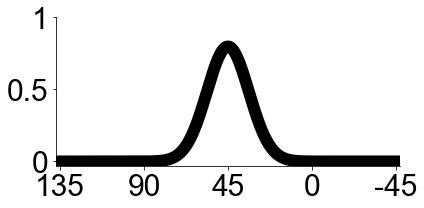

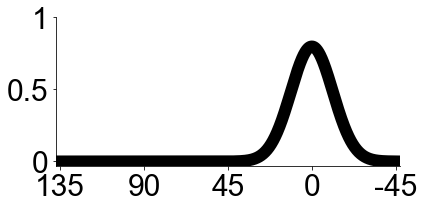

In [7]:
c = ["royalblue", "olivedrab", "darkorange", "firebrick"]
x = np.linspace(-4,4,1000)
lw = 10
for mi,m in enumerate([-2,0,2]):
    _, ax = plt.subplots(1, 1, figsize=(figS, figS*0.5))
    y = norm.pdf(x, loc=m, scale=0.5)
    ax.plot(x, y,  '-', linewidth=line_w+lw, color = "k")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    #ax.spines["bottom"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    ax.grid(False)
    # for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    #     label.set_fontname(f_font1["fontname"])
    #     label.set_fontsize(35)
    ax.xaxis.set_ticks([-4,-2,0,2,4])
    #ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
    ax.xaxis.set_ticklabels(["135", "90", "45", "0", "-45"],**f_font1)
    ax.set_xlim(-4.1, 4.1)
    ax.set_ylim(-0.03, 1)
    ax.yaxis.set_ticks([0,0.5,1])
    #ax.set_xlabel(" ")
    ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
    #plt.tick_params(top=False, bottom=False, left=False, right=False,
    #                labelleft=False, labelbottom=False)
    plt.tight_layout()
    plt.savefig(sp+"post_base_pred"+str(mi)+".pdf")
    plt.show()

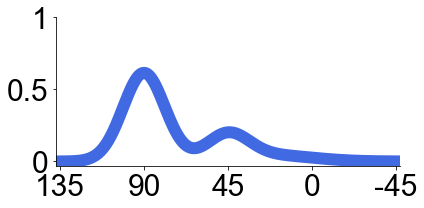

In [37]:
c = ["royalblue", "olivedrab", "darkorange", "firebrick"]
x = np.linspace(-4,4,1000)
lw = 10
w = [0.7, 0.2, 0.1]
sc = 1.1
_, ax = plt.subplots(1, 1, figsize=(figS, figS*0.5))

y1 = norm.pdf(x, loc=-2, scale=0.5)
#ax.plot(x, w[0]*y1,  '-', linewidth=line_w+lw, color = "k")
y2 = norm.pdf(x, loc=0, scale=0.5)
#ax.plot(x, w[1]*y2,  '-', linewidth=line_w+lw, color = "k")
y3 = norm.pdf(x, loc=2, scale=0.5)
#ax.plot(x, 0.05*y3,  '-', linewidth=line_w+lw, color = "k")
ym = np.sum([w[0]*sc*y1, w[1]*sc*y2, w[2]*sc*norm.pdf(x, loc=1, scale=1)], axis=0)
ax.plot(x, ym,  '-', linewidth=line_w+lw, color = c[0])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([-4,-2,0,2,4])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
ax.xaxis.set_ticklabels(["135", "90", "45", "0", "-45"],**f_font1)
ax.set_xlim(-4.1, 4.1)
ax.set_ylim(-0.03, 1)
ax.yaxis.set_ticks([0,0.5,1])
#ax.set_xlabel(" ")
ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
plt.tight_layout()
plt.savefig(sp+"post_test_pred1.pdf")
plt.show()

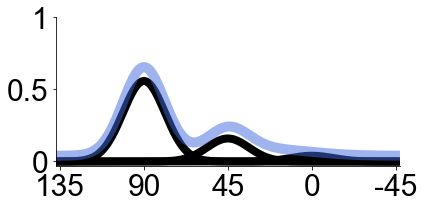

In [43]:
c = ["royalblue", "olivedrab", "darkorange", "firebrick"]
x = np.linspace(-4,4,1000)
lw = 6
w = [0.7, 0.2, 0.1]
sc = 1.1
_, ax = plt.subplots(1, 1, figsize=(figS, figS*0.5))

y1 = norm.pdf(x, loc=-2, scale=0.5)
ax.plot(x, w[0]*y1,  '-', linewidth=line_w+lw, color = "k")
y2 = norm.pdf(x, loc=0, scale=0.5)
ax.plot(x, w[1]*y2,  '-', linewidth=line_w+lw, color = "k")
y3 = norm.pdf(x, loc=2, scale=0.5)
ax.plot(x, 0.05*y3,  '-', linewidth=line_w+lw, color = "k")
ym = np.sum([w[0]*sc*y1, w[1]*sc*y2, w[2]*sc*norm.pdf(x, loc=1, scale=1)], axis=0)
ax.plot(x, ym+0.04,  '-', linewidth=line_w+lw+2, color = c[0], alpha=0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([-4,-2,0,2,4])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
ax.xaxis.set_ticklabels(["135", "90", "45", "0", "-45"],**f_font1)
ax.set_xlim(-4.1, 4.1)
ax.set_ylim(-0.03, 1)
ax.yaxis.set_ticks([0,0.5,1])
#ax.set_xlabel(" ")
ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
plt.tight_layout()
plt.savefig(sp+"post_test_mix_pred1.pdf")
plt.show()

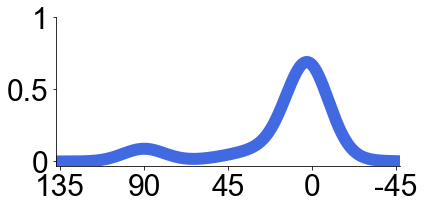

In [44]:
c = ["royalblue", "olivedrab", "darkorange", "firebrick"]
x = np.linspace(-4,4,1000)
lw = 10
w = [0.7, 0.2, 0.1]
sc = 1.1
_, ax = plt.subplots(1, 1, figsize=(figS, figS*0.5))

y1 = norm.pdf(x, loc=-2, scale=0.5)
#ax.plot(x, w[0]*y1,  '-', linewidth=line_w+lw, color = "k")
y2 = norm.pdf(x, loc=0, scale=0.5)
#ax.plot(x, w[1]*y2,  '-', linewidth=line_w+lw, color = "k")
y3 = norm.pdf(x, loc=2, scale=0.5)
#ax.plot(x, 0.05*y3,  '-', linewidth=line_w+lw, color = "k")
ym = np.sum([w[2]*sc*y1, w[1]*sc*sc*norm.pdf(x, loc=1.2, scale=1), w[0]*sc*norm.pdf(x, loc=1.9, scale=0.5)], axis=0)
ax.plot(x, ym,  '-', linewidth=line_w+lw, color = c[0])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([-4,-2,0,2,4])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
ax.xaxis.set_ticklabels(["135", "90", "45", "0", "-45"],**f_font1)
ax.set_xlim(-4.1, 4.1)
ax.set_ylim(-0.03, 1)
ax.yaxis.set_ticks([0,0.5,1])
#ax.set_xlabel(" ")
ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
plt.tight_layout()
plt.savefig(sp+"post_test_pred2.pdf")
plt.show()

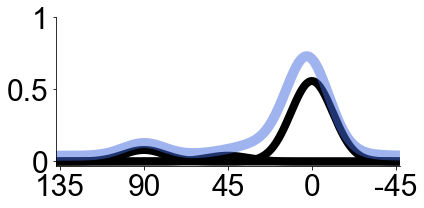

In [45]:
c = ["royalblue", "olivedrab", "darkorange", "firebrick"]
x = np.linspace(-4,4,1000)
lw = 6
w = [0.7, 0.2, 0.1]
sc = 1.1
_, ax = plt.subplots(1, 1, figsize=(figS, figS*0.5))

y1 = norm.pdf(x, loc=-2, scale=0.5)
ax.plot(x, w[2]*y1,  '-', linewidth=line_w+lw, color = "k")
y2 = norm.pdf(x, loc=0, scale=0.5)
ax.plot(x, 0.05*y2,  '-', linewidth=line_w+lw, color = "k")
y3 = norm.pdf(x, loc=2, scale=0.5)
ax.plot(x, w[0]*y3,  '-', linewidth=line_w+lw, color = "k")
ym = np.sum([w[2]*sc*y1, w[1]*sc*sc*norm.pdf(x, loc=1.2, scale=1), w[0]*sc*norm.pdf(x, loc=1.9, scale=0.5)], axis=0)
ax.plot(x, ym+0.04,  '-', linewidth=line_w+lw+2, color = c[0], alpha=0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([-4,-2,0,2,4])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
ax.xaxis.set_ticklabels(["135", "90", "45", "0", "-45"],**f_font1)
ax.set_xlim(-4.1, 4.1)
ax.set_ylim(-0.03, 1)
ax.yaxis.set_ticks([0,0.5,1])
#ax.set_xlabel(" ")
ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
plt.tight_layout()
plt.savefig(sp+"post_test_mix_pred2.pdf")
plt.show()

In [2]:
x, y = np.mgrid[-1:1:.001, -1:1:.001]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
for w,m in zip(W,M):
    Y = Y + w * multivariate_normal.pdf(pos, mean=m, cov=c)
for w,m in zip(W,M):
    Y_ = Y_ + w * multivariate_normal.pdf(pos, mean=m, cov=c_)
ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, )

NameError: name 'W' is not defined

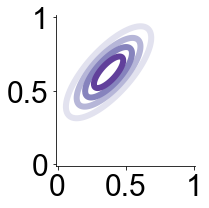

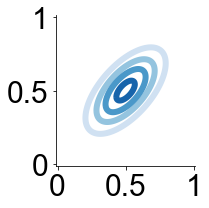

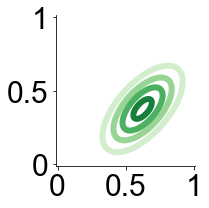

In [15]:
c = ["royalblue", "olivedrab", "darkorange", "firebrick"]
x, y = np.mgrid[-4:4:.01, -4:4:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
lw = 10
CM = ["Purples", "Blues", "Greens", "Oranges", "Reds"]
for mi,m,c in zip(range(3),[[-1,1],[0,0],[1,-1]], [np.array([[2, 1.5], [1.5, 2]]), np.array([[1.9, 1.2], [1.2,1.9]]), np.array([[1.9, 1.5], [1.2,1.9]])]):
    _, ax = plt.subplots(1, 1, figsize=(figS*0.5, figS*0.5))
    Y_ = multivariate_normal.pdf(pos, mean=m, cov=c)
    ax.contour(x, y, Y_, levels=4, linewidths=line_w+4, cmap=CM[mi])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    #ax.spines["bottom"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    ax.grid(False)
    # for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    #     label.set_fontname(f_font1["fontname"])
    #     label.set_fontsize(35)
    ax.xaxis.set_ticks([-4,0,4])
    #ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
    ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
    ax.yaxis.set_ticks([-4,0,4])
    #ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
    ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
    ax.set_xlim(-4.1, 4.1)
    ax.set_ylim(-4.1, 4.1)
    #plt.tick_params(top=False, bottom=False, left=False, right=False,
    #                labelleft=False, labelbottom=False)
    plt.tight_layout()
    plt.savefig(sp+"firing_base_pred"+str(mi)+".pdf")
    plt.show()

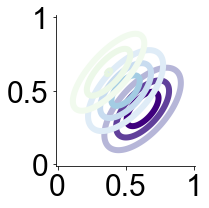

In [16]:
w = [[0.7, 0.2, 0.05],
     [0.12, 0.081, 0.8]]
mij,mj,cj = 0, [-1.5,1.5], np.array([[1, 0.3], [0.3,1]])
_, ax = plt.subplots(1, 1, figsize=(figS*0.5, figS*0.5))
for mi,m,c in zip(range(3),[[1,-1],[0,0],[-1,1]], [np.array([[1.9, 1.5], [1.2,1.9]]), np.array([[1.9, 1.2], [1.2,1.9]]),np.array([[2, 1.5], [1.5, 2]]) ]):
    Y_ = multivariate_normal.pdf(pos, mean=m, cov=c)
    ax.contour(x, y, Y_*w[mij][mi], levels=3, linewidths=line_w+4, cmap=CM[mi],vmin=0, vmax=0.05)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([-4,0,4])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([-4,0,4])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(-4.1, 4.1)
ax.set_ylim(-4.1, 4.1)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
plt.tight_layout()
plt.savefig(sp+"firing_test_mix_pred1"+str(mij)+".pdf")
plt.show()

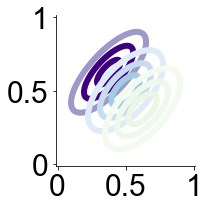

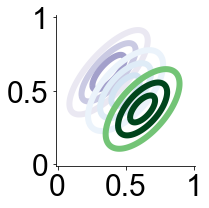

In [17]:
w = [[0.7, 0.2, 0.05],
     [0.25, 0.1, 0.8]]
for mij,mj,cj in zip(range(2),[[-1.5,1.5],[1.5,-1.5]], [np.array([[1, 0.3], [0.3,1]]), np.array([[1, 0.3], [0.3,1]])]):
    _, ax = plt.subplots(1, 1, figsize=(figS*0.5, figS*0.5))
    for mi,m,c in zip(range(3),[[-1,1],[0,0],[1,-1]], [np.array([[2, 1.5], [1.5, 2]]), np.array([[1.9, 1.2], [1.2,1.9]]), np.array([[1.9, 1.5], [1.2,1.9]])]):
        Y_ = multivariate_normal.pdf(pos, mean=m, cov=c)
        ax.contour(x, y, Y_*w[mij][mi], levels=3, linewidths=line_w+4, cmap=CM[mi],vmin=0, vmax=0.05)
    #Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
    #ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    #ax.spines["bottom"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    ax.grid(False)
    # for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    #     label.set_fontname(f_font1["fontname"])
    #     label.set_fontsize(35)
    ax.xaxis.set_ticks([-4,0,4])
    #ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
    ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
    ax.yaxis.set_ticks([-4,0,4])
    #ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
    ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
    ax.set_xlim(-4.1, 4.1)
    ax.set_ylim(-4.1, 4.1)
    #plt.tick_params(top=False, bottom=False, left=False, right=False,
    #                labelleft=False, labelbottom=False)
    plt.tight_layout()
    plt.savefig(sp+"firing_test_mix_pred1"+str(mij)+".pdf")
    plt.show()

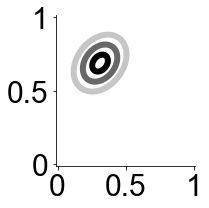

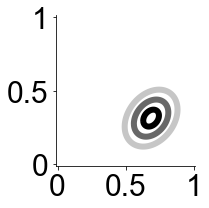

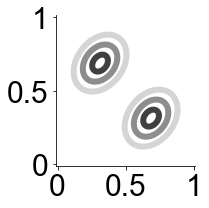

In [18]:
for mi,m,c in zip(range(2),[[-1.5,1.5],[1.5,-1.5]], [np.array([[1, 0.3], [0.3,1]]), np.array([[1, 0.3], [0.3,1]])]):
    _, ax = plt.subplots(1, 1, figsize=(figS*0.5, figS*0.5))
    Y_ = multivariate_normal.pdf(pos, mean=m, cov=c)
    ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Greys",vmin=0, vmax=0.15)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    #ax.spines["bottom"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    ax.grid(False)
    # for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    #     label.set_fontname(f_font1["fontname"])
    #     label.set_fontsize(35)
    ax.xaxis.set_ticks([-4,0,4])
    #ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
    ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
    ax.yaxis.set_ticks([-4,0,4])
    #ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
    ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
    ax.set_xlim(-4.1, 4.1)
    ax.set_ylim(-4.1, 4.1)
    #plt.tick_params(top=False, bottom=False, left=False, right=False,
    #                labelleft=False, labelbottom=False)
    plt.tight_layout()
    plt.savefig(sp+"firing_ill_pred1"+str(mi)+".pdf")
    plt.show()

_, ax = plt.subplots(1, 1, figsize=(figS*0.5, figS*0.5))
Y_1 = multivariate_normal.pdf(pos, mean=[-1.5,1.5], cov=np.array([[1, 0.3], [0.3,1]]))
Y_2 = multivariate_normal.pdf(pos, mean=[1.5,-1.5], cov=np.array([[1, 0.3], [0.3,1]]))
ax.contour(x, y, 0.8*Y_1+0.8*Y_2, levels=3, linewidths=line_w+4, cmap="Greys",vmin=0, vmax=0.15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([-4,0,4])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([-4,0,4])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.set_xlim(-4.1, 4.1)
ax.set_ylim(-4.1, 4.1)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
plt.tight_layout()
plt.savefig(sp+"firing_ill_mixpred1.pdf")
plt.show()

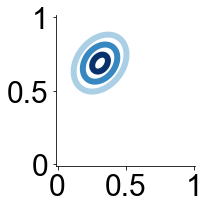

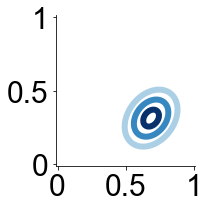

In [19]:
for mi,m,c in zip(range(2),[[-1.5,1.5],[1.5,-1.5]], [np.array([[1, 0.3], [0.3,1]]), np.array([[1, 0.3], [0.3,1]])]):
    _, ax = plt.subplots(1, 1, figsize=(figS*0.5, figS*0.5))
    Y_ = multivariate_normal.pdf(pos, mean=m, cov=c)
    ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues",vmin=0, vmax=0.15)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    #ax.spines["bottom"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    ax.grid(False)
    # for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    #     label.set_fontname(f_font1["fontname"])
    #     label.set_fontsize(35)
    ax.xaxis.set_ticks([-4,0,4])
    #ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
    ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
    ax.yaxis.set_ticks([-4,0,4])
    #ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
    ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
    ax.set_xlim(-4.1, 4.1)
    ax.set_ylim(-4.1, 4.1)
    #plt.tick_params(top=False, bottom=False, left=False, right=False,
    #                labelleft=False, labelbottom=False)
    plt.tight_layout()
    plt.savefig(sp+"firing_test_pred1"+str(mi)+".pdf")
    plt.show()

In [50]:
np.mean(np.mean(Y_*w[mij][mi], axis=0))

0.0015430959047635423

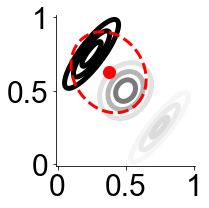

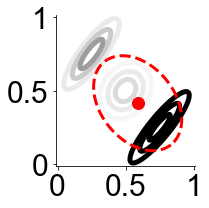

In [64]:
w = [[0.7, 0.2, 0.05],
     [0.12, 0.081, 0.8]]
for mij,mj,cj in zip(range(2),[[-1.5,1.5],[1.5,-1.5]], [np.array([[1, 0.3], [0.3,1]]), np.array([[1, 0.3], [0.3,1]])]):
    _, ax = plt.subplots(1, 1, figsize=(figS*0.5, figS*0.5))
    for mi,m,c in zip(range(3),[[-2,2],[0,0],[2,-2]], [np.array([[1, 1.4], [1, 1.4]]), np.array([[0.9, 0.2], [0.2,0.9]]), np.array([[1.2, 1.5], [1.2,1.5]])]):
        Y_ = multivariate_normal.pdf(pos, mean=m, cov=c)
        ax.contour(x, y, Y_*w[mij][mi], levels=3, linewidths=line_w+3, cmap="Greys",vmin=0, vmax=0.05)
    #Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
    #ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
    de = 1
    if mij==0:
        x0 = np.mean(np.mean(Y_*w[mij][mi], axis=0))-de
        y0=np.mean(np.mean(Y_*w[mij][mi], axis=1))+de
        ax.plot(x0, y0, "ro", markersize=12)
        # Define the semi-major and semi-minor axes
        a = 2.4  # length of semi-major axis
        b = 2  # length of semi-minor axis
    else:
        x0=np.mean(np.mean(Y_*w[mij][mi], axis=0))+de-0.3
        y0=np.mean(np.mean(Y_*w[mij][mi], axis=1))-de+0.3
        ax.plot(x0,y0, "ro", markersize=12)
        # Define the semi-major and semi-minor axes
        a = 3  # length of semi-major axis
        b = 2.1  # length of semi-minor axis
    

    # Generate angle values
    theta = np.linspace(0, 2 * np.pi, 100)

    # Parametric equation of the ellipse
    xe = a * np.cos(theta) + x0
    ye = b * np.sin(theta) + y0

    phi = np.radians(-45) 
    # Apply rotation to the ellipse
    x_rotated = (xe - x0) * np.cos(phi) - (ye - y0) * np.sin(phi) + x0
    y_rotated = (xe - x0) * np.sin(phi) + (ye - y0) * np.cos(phi) + y0

    ax.plot(x_rotated, y_rotated, "r--", linewidth=3)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    #ax.spines["bottom"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    ax.grid(False)
    # for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    #     label.set_fontname(f_font1["fontname"])
    #     label.set_fontsize(35)
    ax.xaxis.set_ticks([-4,0,4])
    #ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
    ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
    ax.yaxis.set_ticks([-4,0,4])
    #ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
    ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
    ax.set_xlim(-4.1, 4.1)
    ax.set_ylim(-4.1, 4.1)
    #plt.tick_params(top=False, bottom=False, left=False, right=False,
    #                labelleft=False, labelbottom=False)
    plt.tight_layout()
    plt.savefig(sp+"firing_test_mix_pred"+str(mij)+".pdf")
    plt.show()

In [67]:
182/(182+198)

0.4789473684210526

In [68]:
198/(182+198)

0.5210526315789473

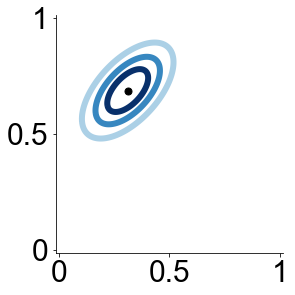

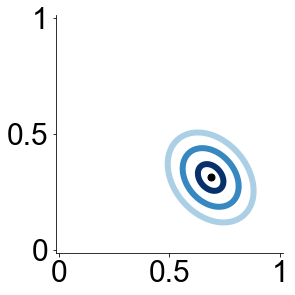

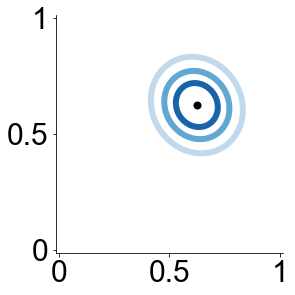

In [185]:
c = ["royalblue", "olivedrab", "darkorange", "firebrick"]
x, y = np.mgrid[-4:4:.01, -4:4:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
lw = 10
CM = ["Purples", "Blues", "Greens", "Oranges", "Reds"]
for mi,m,c in zip(range(3),[[-1.5,1.5],[1.5,-1.5], [1,1]], [np.array([[1, 0.59], [0.59,1]]), np.array([[1, -0.3], [-0.3,1]]), np.array([[1, -0.1], [-0.1,1]])]):
    _, ax = plt.subplots(1, 1, figsize=(figS*0.7, figS*0.7))
    Y_ = multivariate_normal.pdf(pos, mean=m, cov=c)
    ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues",vmin=0, vmax=0.15)
    ax.plot(m[0], m[1], "ko", markersize=7)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    #ax.spines["bottom"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    ax.grid(False)
    # for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    #     label.set_fontname(f_font1["fontname"])
    #     label.set_fontsize(35)
    ax.xaxis.set_ticks([-4,0,4])
    #ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
    ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
    ax.yaxis.set_ticks([-4,0,4])
    #ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
    ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
    ax.set_xlim(-4.1, 4.1)
    ax.set_ylim(-4.1, 4.1)
    #plt.tick_params(top=False, bottom=False, left=False, right=False,
    #                labelleft=False, labelbottom=False)
    plt.tight_layout()
    plt.savefig(sp+"firing_example_meta1"+str(mi)+".pdf")
    plt.show()

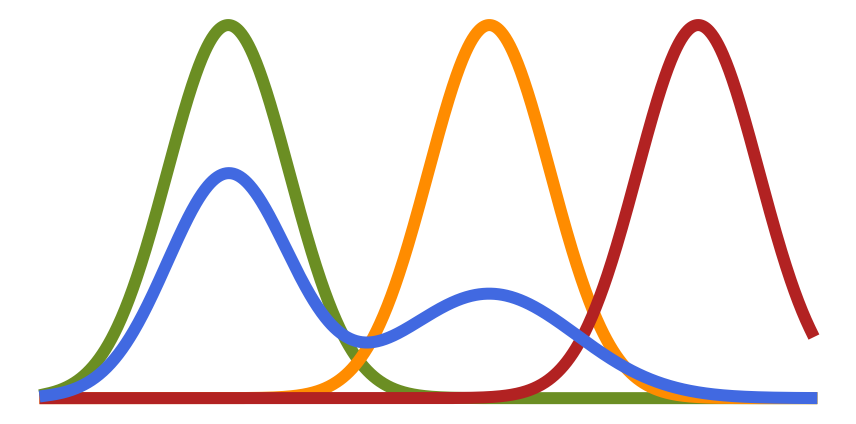

In [5]:
_, ax = plt.subplots(1, 1, figsize=(figS*2, figS))
c = ["royalblue", "olivedrab", "darkorange", "firebrick"]
x = np.linspace(-4.8,4,1000)
lw = 10
y = norm.pdf(x, loc=-2.7, scale=0.7)
ax.plot(x, y,  '-', linewidth=line_w+lw, color = c[1])
y = norm.pdf(x, loc=0.3, scale=0.7)
ax.plot(x, y,  '-', linewidth=line_w+lw, color = c[2])
y = norm.pdf(x, loc=2.7, scale=0.7)
ax.plot(x, y,  '-', linewidth=line_w+lw, color = c[3])
y = np.sum([0.6*norm.pdf(x, loc=-2.7, scale=0.7), 0.4*norm.pdf(x, loc=0.3, scale=1)], axis=0)
ax.plot(x, y,  '-', linewidth=line_w+lw, color = c[0])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
#ax.xaxis.set_ticks(range(1,len(M)+1))
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["#"+str(i+1) for i in range(len(M))])
#ax.set_xlim(0, 10)
#ax.set_ylim(-0.03, 0.4)
#ax.yaxis.set_ticks(yax)
#ax.set_xlabel(" ")
#ax.set_ylabel(L[i], **f_font2)
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
plt.tight_layout()
plt.savefig(sp+"mixture_pred1.pdf")
plt.show()

/var/folders/7v/b8fs48v95fxb7gdt_3bqj7q00000gp/T/ipykernel_24809/1877645258.py:25: UserWarning: linewidths is ignored by contourf
  ax.contourf(x, y, Y_, levels=40, linewidths=line_w+4, cmap=CM[2])#,vmin=0, vmax=0.05)


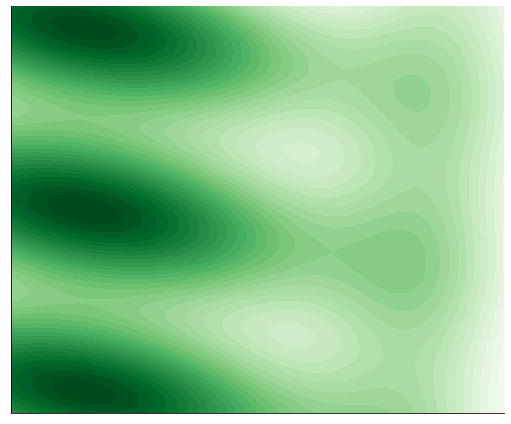

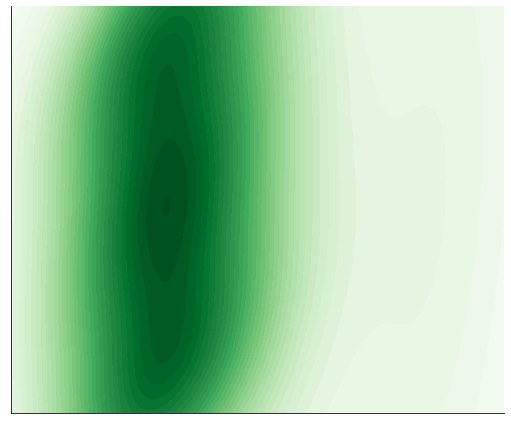

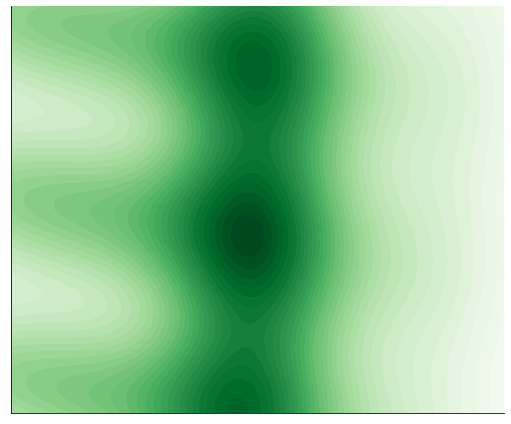

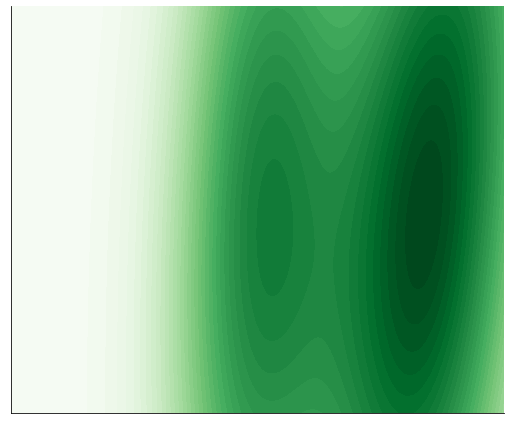

In [13]:
x, y = np.mgrid[-1:1:.001, -1:1:.001]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
CM = ["Purples", "Blues", "Greens", "Oranges", "Reds"]
w = [[2/3, 2/3, 2/3, 2/3], 
     [2/5, 3/5,3/5,3/5, 2/5], 
     [1/5, 1/5,1/5,1/5, 3/5],
    [3/4, 2/4]]
MM = [[[0.7,0],[-0.7,0.9],[-0.7,0],[-0.7,-0.9]],
    [[0.7,0],[-0.4,0.9],[-0.4,0],[-0.4,-0.9], [0,0]],
    [[0.7,0],[-0.7,0.9],[-0.7,0],[-0.7,-0.9],[0,0]],
    [[0.7,0],[0,0]]]
CC = [[np.array([[0.1, 0.3], [0.2,3]]),np.array([[0.5, -0.1], [-0.1,0.1]]),np.array([[0.5, -0.1], [-0.1,0.1]]),np.array([[0.5, -0.1], [-0.1,0.1]])],
    [np.array([[0.1, 0.3], [0.2,3]]),np.array([[0.1, 0.1], [0.1,0.3]]),np.array([[0.1, 0.1], [0.1,0.3]]),np.array([[0.1, 0.1], [0.1,0.3]]),np.array([[0.07, 0.1], [0.1,3]])],
    [np.array([[0.1, 0.3], [0.2,3]]),np.array([[0.5, -0.1], [-0.1,0.1]]),np.array([[0.5, -0.1], [-0.1,0.1]]),np.array([[0.5, -0.1], [-0.1,0.1]]), np.array([[0.07, 0.1], [0.1,3]])],
    [np.array([[0.1, 0.3], [0.2,3]]),np.array([[0.07, 0.1], [0.1,3]])]]
for Mi,M,C in zip(range(len(MM)),MM, CC):
    _, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS))
    Y_ = 0
    for mi,m,c in zip(range(len(M)),M, C):
        y_ = multivariate_normal.pdf(pos, mean=m, cov=c)
        Y_ += w[Mi][mi]*y_
    #ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
    ax.contourf(x, y, Y_, levels=40, linewidths=line_w+4, cmap=CM[2])#,vmin=0, vmax=0.05)
    #ax.imshow(Y_)
    #Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
    #ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    #ax.spines["bottom"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    ax.grid(False)
    # for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    #     label.set_fontname(f_font1["fontname"])
    #     label.set_fontsize(35)
    ax.xaxis.set_ticks([ ])
    #ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
    #ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
    ax.yaxis.set_ticks([ ])
    #ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
    #ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
    #ax.set_xlim(-1, 1)
    #ax.set_ylim(-1, 1)
    #plt.tick_params(top=False, bottom=False, left=False, right=False,
    #                labelleft=False, labelbottom=False)
    plt.tight_layout()
    plt.savefig(sp+"post1.pdf")
    plt.show()

/var/folders/7v/b8fs48v95fxb7gdt_3bqj7q00000gp/T/ipykernel_13094/1602213805.py:4: UserWarning: linewidths is ignored by contourf
  ax.contourf(x, y, y_, levels=20, linewidths=line_w+4, cmap=CM[1])#,vmin=0, vmax=0.05)


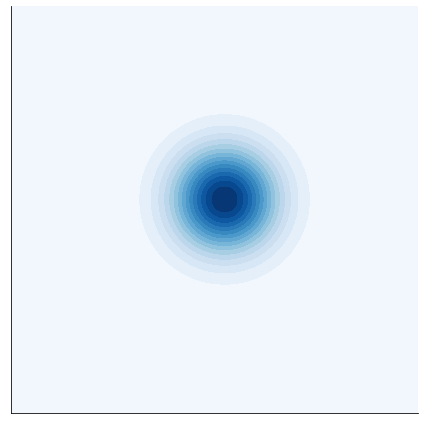

In [22]:
x, y = np.mgrid[-1:1:.001, -1:1:.001]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
_, ax = plt.subplots(1, 1, figsize=(figS, figS))
y_ = multivariate_normal.pdf(pos, mean=[0.2,0.2], cov=[[0.5,0.],[0.,0.5]])
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
ax.contourf(x, y, y_, levels=20, linewidths=line_w+4, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
#ax.set_xlim(-1, 1)
#ax.set_ylim(-1, 1)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
plt.tight_layout()
plt.savefig(sp+"post1.pdf")
plt.show()

/var/folders/7v/b8fs48v95fxb7gdt_3bqj7q00000gp/T/ipykernel_13094/1223130292.py:20: UserWarning: linewidths is ignored by contourf
  ax.contourf(x, y, mixture_pdf, levels=20, linewidths=line_w+4, cmap=CM[1])#,vmin=0, vmax=0.05)


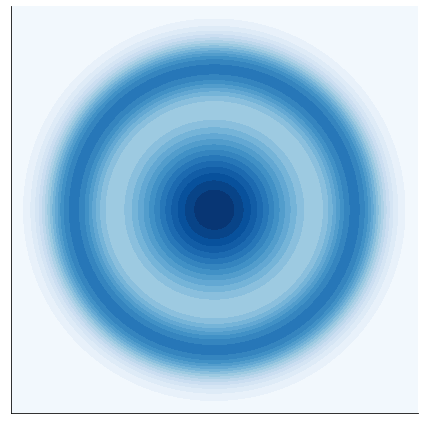

In [36]:


x, y = np.mgrid[-1:1:.001, -1:1:.001]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
_, ax = plt.subplots(1, 1, figsize=(figS, figS))
mean1 = [0,0]
pdf1 = multivariate_normal.pdf(pos, mean=mean1, cov=[[0.1,0.],[0.,0.1]])

# Define the radial distance from the mean for the second PDF
r = np.sqrt((x - mean1[0])**2 + (y - mean1[1])**2)
sigma_r = 0.1  # Controls the width of the ring
center_r = 0.7  # Controls the radius of the ring
pdf2 = np.exp(-0.5 * ((r - center_r) / sigma_r) ** 2)

# Combine the two PDFs into a mixture density
weight1 = 0.5  # Weight for the first PDF
weight2 = 0.5  # Weight for the second PDF
mixture_pdf = weight1 * pdf1 + weight2 * pdf2
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
ax.contourf(x, y, mixture_pdf, levels=20, linewidths=line_w+4, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
#ax.set_xlim(-1, 1)
#ax.set_ylim(-1, 1)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
plt.tight_layout()
plt.savefig(sp+"post1_conc.pdf")
plt.show()

/var/folders/7v/b8fs48v95fxb7gdt_3bqj7q00000gp/T/ipykernel_13094/194528703.py:10: UserWarning: linewidths is ignored by contourf
  ax.contourf(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[1])#,vmin=0, vmax=0.05)


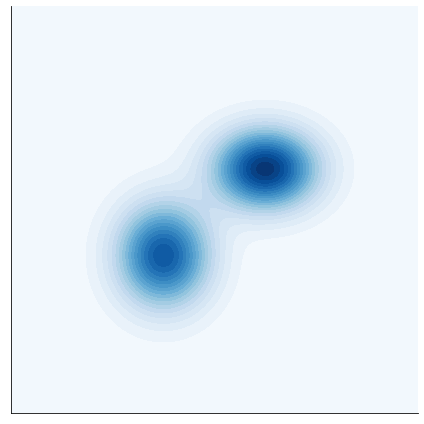

In [28]:

M = [[-1,-.9],[1,0.8]]
C = [np.array([[0.4, 0.], [0.,0.5]]),np.array([[0.5, 0.], [0.,0.3]])]

_, ax = plt.subplots(1, 1, figsize=(figS, figS))
Y_ = 0
for mi,m,c in zip(range(len(M)),M, C):
    y_ = multivariate_normal.pdf(pos, mean=m, cov=c)
    Y_ += 0.5*y_
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
ax.contourf(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
#ax.set_xlim(-1, 1)
#ax.set_ylim(-1, 1)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
plt.tight_layout()
plt.savefig(sp+"post2.pdf")
plt.show()

/var/folders/7v/b8fs48v95fxb7gdt_3bqj7q00000gp/T/ipykernel_13094/2579337710.py:9: UserWarning: linewidths is ignored by contourf
  ax.contourf(x, y, y_, levels=20, linewidths=line_w+4, cmap=CM[1])#,vmin=0, vmax=0.05)


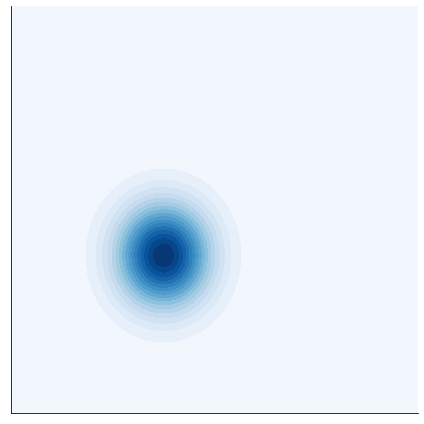

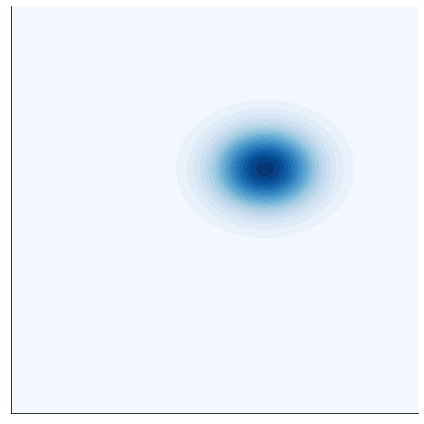

In [29]:
M = [[-1,-.9],[1,0.8]]
C = [np.array([[0.4, 0.], [0.,0.5]]),np.array([[0.5, 0.], [0.,0.3]])]


for mi,m,c in zip(range(len(M)),M, C):

    _, ax = plt.subplots(1, 1, figsize=(figS, figS))
    y_ = multivariate_normal.pdf(pos, mean=m, cov=c)
    ax.contourf(x, y, y_, levels=20, linewidths=line_w+4, cmap=CM[1])#,vmin=0, vmax=0.05)
    #ax.imshow(Y_)
    #Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
    #ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    #ax.spines["bottom"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    ax.grid(False)
    # for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    #     label.set_fontname(f_font1["fontname"])
    #     label.set_fontsize(35)
    ax.xaxis.set_ticks([ ])
    #ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
    #ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
    ax.yaxis.set_ticks([ ])
    #ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
    #ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
    #ax.set_xlim(-1, 1)
    #ax.set_ylim(-1, 1)
    #plt.tick_params(top=False, bottom=False, left=False, right=False,
    #                labelleft=False, labelbottom=False)
    plt.tight_layout()
    plt.savefig(sp+"post2"+str(mi)+".pdf")
    plt.show()

/var/folders/7v/b8fs48v95fxb7gdt_3bqj7q00000gp/T/ipykernel_24809/2501095866.py:10: UserWarning: linewidths is ignored by contourf
  con = ax.contourf(x, y, Y_, levels=30, linewidths=line_w+4, cmap=CM[1])#,vmin=0, vmax=0.05)


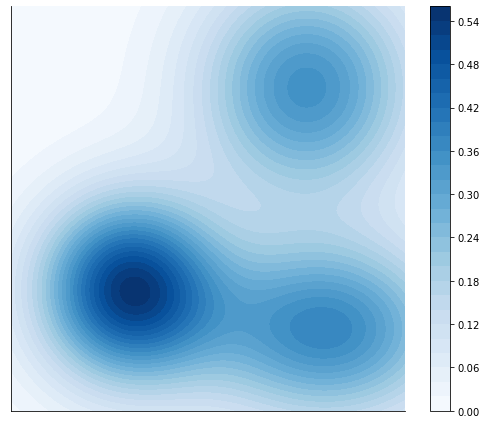

In [17]:

M = [[-0.4,-0.4],[0.6,-0.6],[0.5,0.6]]
C = [np.array([[0.1, 0.], [0.,0.1]]),np.array([[0.2, 0.], [0.,0.1]]),np.array([[0.15, 0.], [0.,0.15]])]

_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS))
Y_ = 0
for mi,m,c in zip(range(len(M)),M, C):
    y_ = multivariate_normal.pdf(pos, mean=m, cov=c)
    Y_ += 0.33*y_
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
con = ax.contourf(x, y, Y_, levels=30, linewidths=line_w+4, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
#ax.set_xlim(-1, 1)
#ax.set_ylim(-1, 1)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
plt.colorbar(con)
plt.tight_layout()
plt.savefig(sp+"post3.pdf")
plt.show()

In [18]:
sigmoid(x,0.3)

TypeError: sigmoid() missing 1 required positional argument: 'b'

/var/folders/7v/b8fs48v95fxb7gdt_3bqj7q00000gp/T/ipykernel_13094/3826972534.py:23: UserWarning: linewidths is ignored by contourf
  con = ax.contourf(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[-1])#,vmin=0, vmax=0.05)


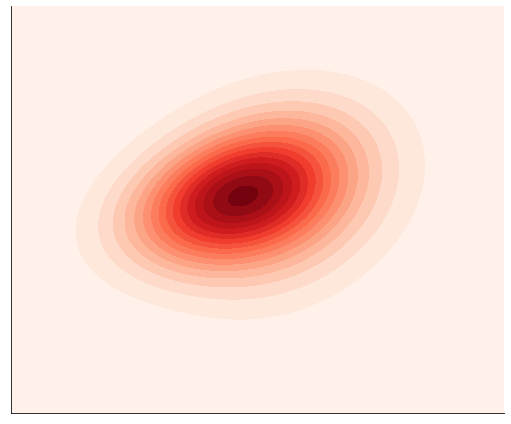

In [38]:
def sigmoid(x,s,b):
    return 1 / (1 + np.exp((-x+b)/s))
x, y = np.mgrid[-2:2:.001, -2:2:.001]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
#M = [[-0.6,-0.6],[0,0]]
#C = [np.array([[0.2, 0.1], [0.1,0.2]]),np.array([[0.4, 0.1], [0.1,0.4]])]
M = [[0.3,0.3],[0.,0.]]
C = [np.array([[0.2, 0.1], [0.1,0.2]]),np.array([[0.2, 0.1], [0.1,0.2]])]
M = [[-0.4,0.],[0,0]]
C = [np.array([[0.3, 0.], [0.1,0.2]]),np.array([[0.4, 0.1], [0.1,0.4]])]
#M = [[0.4,-0.3],[0,0]]
#C = [np.array([[0.2, 0.1], [0.,0.2]]),np.array([[0.4, 0.1], [0.1,0.4]])]
ss = 0.5
bb = -0.3
_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS))
Y_ = 0
for mi,m,c in zip(range(len(M)),M, C):
    y_ = multivariate_normal.pdf(pos, mean=m, cov=c)
    Y_ += 0.5*y_*(0.5*sigmoid(x,ss,bb)+0.5*sigmoid(y,ss,bb))
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
con = ax.contourf(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[-1])#,vmin=0, vmax=0.05)
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
#ax.set_xlim(-1, 1)
#ax.set_ylim(-1, 1)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
#plt.colorbar(con)
plt.tight_layout()
plt.savefig(sp+"r4.pdf")
plt.show()

/var/folders/7v/b8fs48v95fxb7gdt_3bqj7q00000gp/T/ipykernel_24809/192348744.py:7: UserWarning: linewidths is ignored by contourf
  ax.contourf(x, y, y_, levels=20, linewidths=line_w+4, cmap=CM[1])#,vmin=0, vmax=0.05)


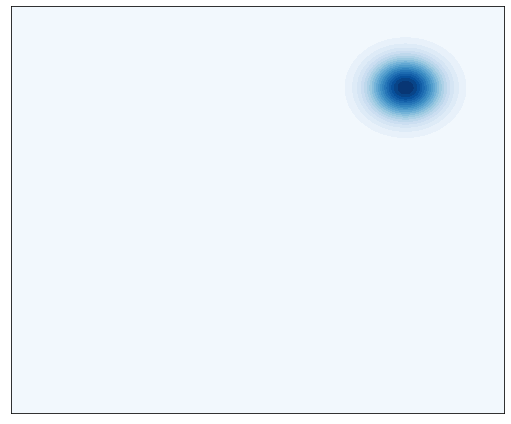

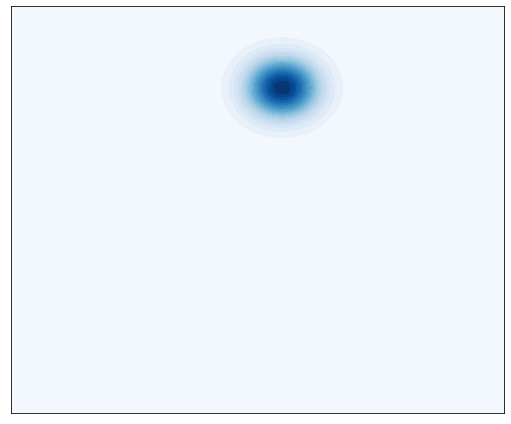

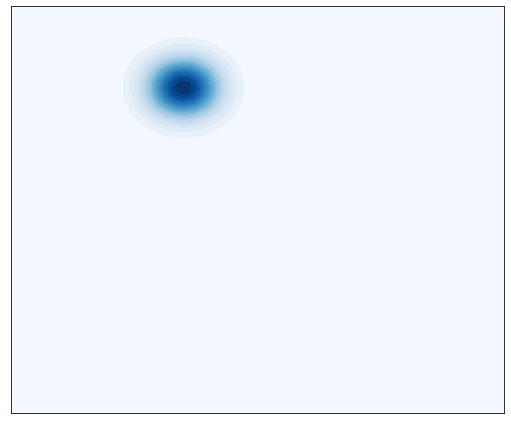

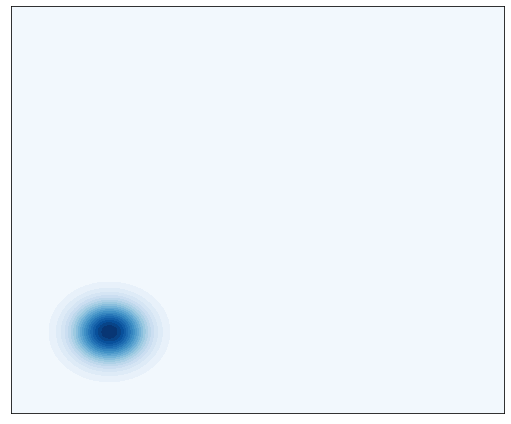

In [38]:
x1 = [0.6,0.1,-0.3,-0.6]
x2 = [0.6,0.6,0.6,-0.6]
for i in range(4):
    _, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS))
    y_ = multivariate_normal.pdf(pos, mean=[x1[i],x2[i]], cov=[[0.01,0.],[0.,0.01]])
    #ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
    ax.contourf(x, y, y_, levels=20, linewidths=line_w+4, cmap=CM[1])#,vmin=0, vmax=0.05)
    #ax.imshow(Y_)
    #Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
    #ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
    #ax.spines["top"].set_visible(False)
    #ax.spines["right"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    #ax.spines["bottom"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    ax.grid(False)
    # for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    #     label.set_fontname(f_font1["fontname"])
    #     label.set_fontsize(35)
    ax.xaxis.set_ticks([ ])
    #ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
    #ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
    ax.yaxis.set_ticks([ ])
    #ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
    #ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
    #ax.set_xlim(-1, 1)
    #ax.set_ylim(-1, 1)
    #plt.tick_params(top=False, bottom=False, left=False, right=False,
    #                labelleft=False, labelbottom=False)
    plt.tight_layout()
    plt.savefig(sp+"post_sharp"+str(i)+".pdf")
    plt.show()

/var/folders/7v/b8fs48v95fxb7gdt_3bqj7q00000gp/T/ipykernel_24809/2877461240.py:10: UserWarning: linewidths is ignored by contourf
  ax.contourf(x, y, Y_, levels=30, linewidths=line_w+4, cmap=CM[1])#,vmin=0, vmax=0.05)


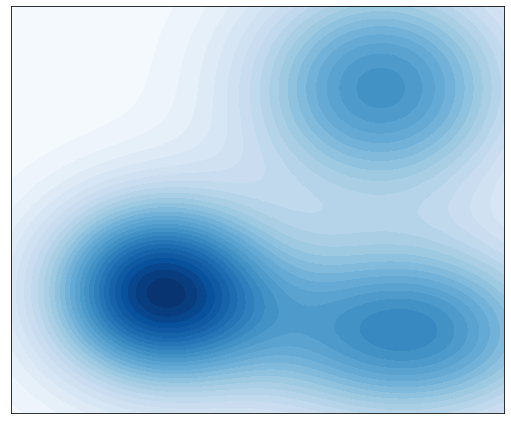

In [37]:

M = [[-0.4,-0.4],[0.6,-0.6],[0.5,0.6]]
C = [np.array([[0.1, 0.], [0.,0.1]]),np.array([[0.2, 0.], [0.,0.1]]),np.array([[0.15, 0.], [0.,0.15]])]

_, ax = plt.subplots(1, 1, figsize=(figS*1.2, figS))
Y_ = 0
for mi,m,c in zip(range(len(M)),M, C):
    y_ = multivariate_normal.pdf(pos, mean=m, cov=c)
    Y_ += 0.33*y_
#ax.contour(x, y, Y_, levels=20, linewidths=line_w+4, cmap=CM[0])#,vmin=0, vmax=0.05)
ax.contourf(x, y, Y_, levels=30, linewidths=line_w+4, cmap=CM[1])#,vmin=0, vmax=0.05)
#ax.imshow(Y_)
#Y_ = multivariate_normal.pdf(pos, mean=mj, cov=cj)
#ax.contour(x, y, Y_, levels=3, linewidths=line_w+4, cmap="Blues")
#ax.spines["top"].set_visible(False)
#ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.grid(False)
# for label in (ax.get_xticklabels()+ax.get_yticklabels()):
#     label.set_fontname(f_font1["fontname"])
#     label.set_fontsize(35)
ax.xaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.xaxis.set_ticklabels(["0","0.5","1"], **f_font1)
ax.yaxis.set_ticks([ ])
#ax.yaxis.set_ticks([0,0.1,0.2,0.3, 0.4])
#ax.yaxis.set_ticklabels(["0","0.5","1"], **f_font1)
#ax.set_xlim(-1, 1)
#ax.set_ylim(-1, 1)
#plt.tick_params(top=False, bottom=False, left=False, right=False,
#                labelleft=False, labelbottom=False)
plt.tight_layout()
plt.savefig(sp+"post3.pdf")
plt.show()